In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lib.core import *
from lib.read_data_basic import *

[16:59:21] lib:INFO: Default saving mode set to do_save False
[16:59:21] lib:INFO: Making sure output folder is defined and exists in the location where the library is imported: ./test
[16:59:21] lib:INFO: Loading chromsizes for danRer11 (reduced)
[16:59:21] lib:INFO: Loading chromosome arm sizes table
[16:59:21] lib:INFO: Loading differential fountain calls (mutant vs WT)
[16:59:21] lib:INFO: Collecting cooler paths for danRer11 datasets
[16:59:21] lib:INFO: Opening base cooler at /home/agalicina/DANIO/HIC/data_danrer11/distiller/results_danrer11/coolers_library_group/WT.danrer11-reduced.mapq_30.1000.mcool::/resolutions/10000
[16:59:21] lib:INFO: Extracting bins table from cooler
[16:59:21] lib:INFO: Loading clean bins with 50 Kb buffer from unmappable regions
[16:59:21] lib:INFO: Loading CTCF motif calls from JASPAR track
[16:59:21] lib:INFO: Loading ATAC-seq peaks (ATAC-Seq_4.5h_DCD019097DT) and annotating CTCF motifs
[16:59:22] lib:INFO: Loading ATAC-seq peaks (ATAC-Seq_12h_DCD0190

In [4]:
pd.DataFrame(check_dep_versions())

Python       tqdm  numpy pandas   scipy statsmodels matplotlib  \
installed    3.12.12     4.67.1  2.3.5  2.3.3  1.16.3      0.14.5     3.10.8   
expected        3.12       None  2.3.5  2.3.3  1.16.3      0.14.5     3.10.8   
op                ==       None     >=     >=      >=          >=         >=   
status     installed  installed     ok     ok      ok          ok         ok   

          seaborn datashader ultraplot scikit-learn  cooler cooltools  \
installed  0.13.2     0.18.2    1.66.0        1.7.2  0.10.4     0.7.1   
expected   0.13.2     0.18.2    1.66.0         None  0.10.4     0.7.1   
op             >=         >=        >=         None      >=        >=   
status         ok         ok        ok    installed      ok        ok   

          bioframe fontanka  pybbi  
installed    0.8.0      0.2  0.4.2  
expected     0.8.0      0.2  0.4.2  
op              >=       >=     >=  
status          ok       ok     ok

In [3]:
from lib.read_data_epigenetics import *
from lib.read_data_hic import *

[04:35:53] lib:INFO: Collecting epigenetic stacks (default flank)
[04:35:53] lib:INFO: Collecting epigenetic background bedgraphs
[04:36:12] lib:INFO: Loaded 246 background bedgraphs
[04:36:44] lib:INFO: Loaded 246 stacks (default flank)
[04:36:44] lib:INFO: Building 10 Kb bin annotation table
[04:36:44] lib:INFO: Merging 246 bedgraph tracks into bin annotations
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 246/246 [00:19<00:00, 12.58it/s]
[04:37:03] lib:INFO: Loading replication initiation zones (Supplemental Dataset 4)
[04:37:03] lib:INFO: Loading origin-to-fountain distance tables
[04:37:04] lib:INFO: Loading ATAC-seq peaks around summits (WT)
[04:37:04] lib:INFO: Loading fountain BEDs for sources: WT, Wild-Type_2.75, TR, Wild-Type_11, Wild-Type_25
[04:37:04] lib:INFO: Loading 200 Kb snippet dct_stacks_hic for sources: WT, PS, SN, NP, TR, MZsox19b_5.3, MZnanog_5.3, MZspg_5

In [4]:
# # Set up saving mode
do_save = True
output_folder = "./results_2025-12-03_AxG"
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

# + Up/Same/Down fountains in *MZTriple* (Fig. 3e, 4a, 4b, 4c)

### + General epigenetics (Fig. 3E bottom)

In [5]:
section_start()

✅ Section started


In [6]:
conds = [
    (df_fount_differential.query('diff_TR_vs_WT=="down"').index, "DOWN", color_WT),
    (df_fount_differential.query('diff_TR_vs_WT=="same"').index, "SAME", color_WT),
    (df_fount_differential.query('diff_TR_vs_WT=="up"').index, "UP", color_WT),
]

In [7]:
flank = 200_000

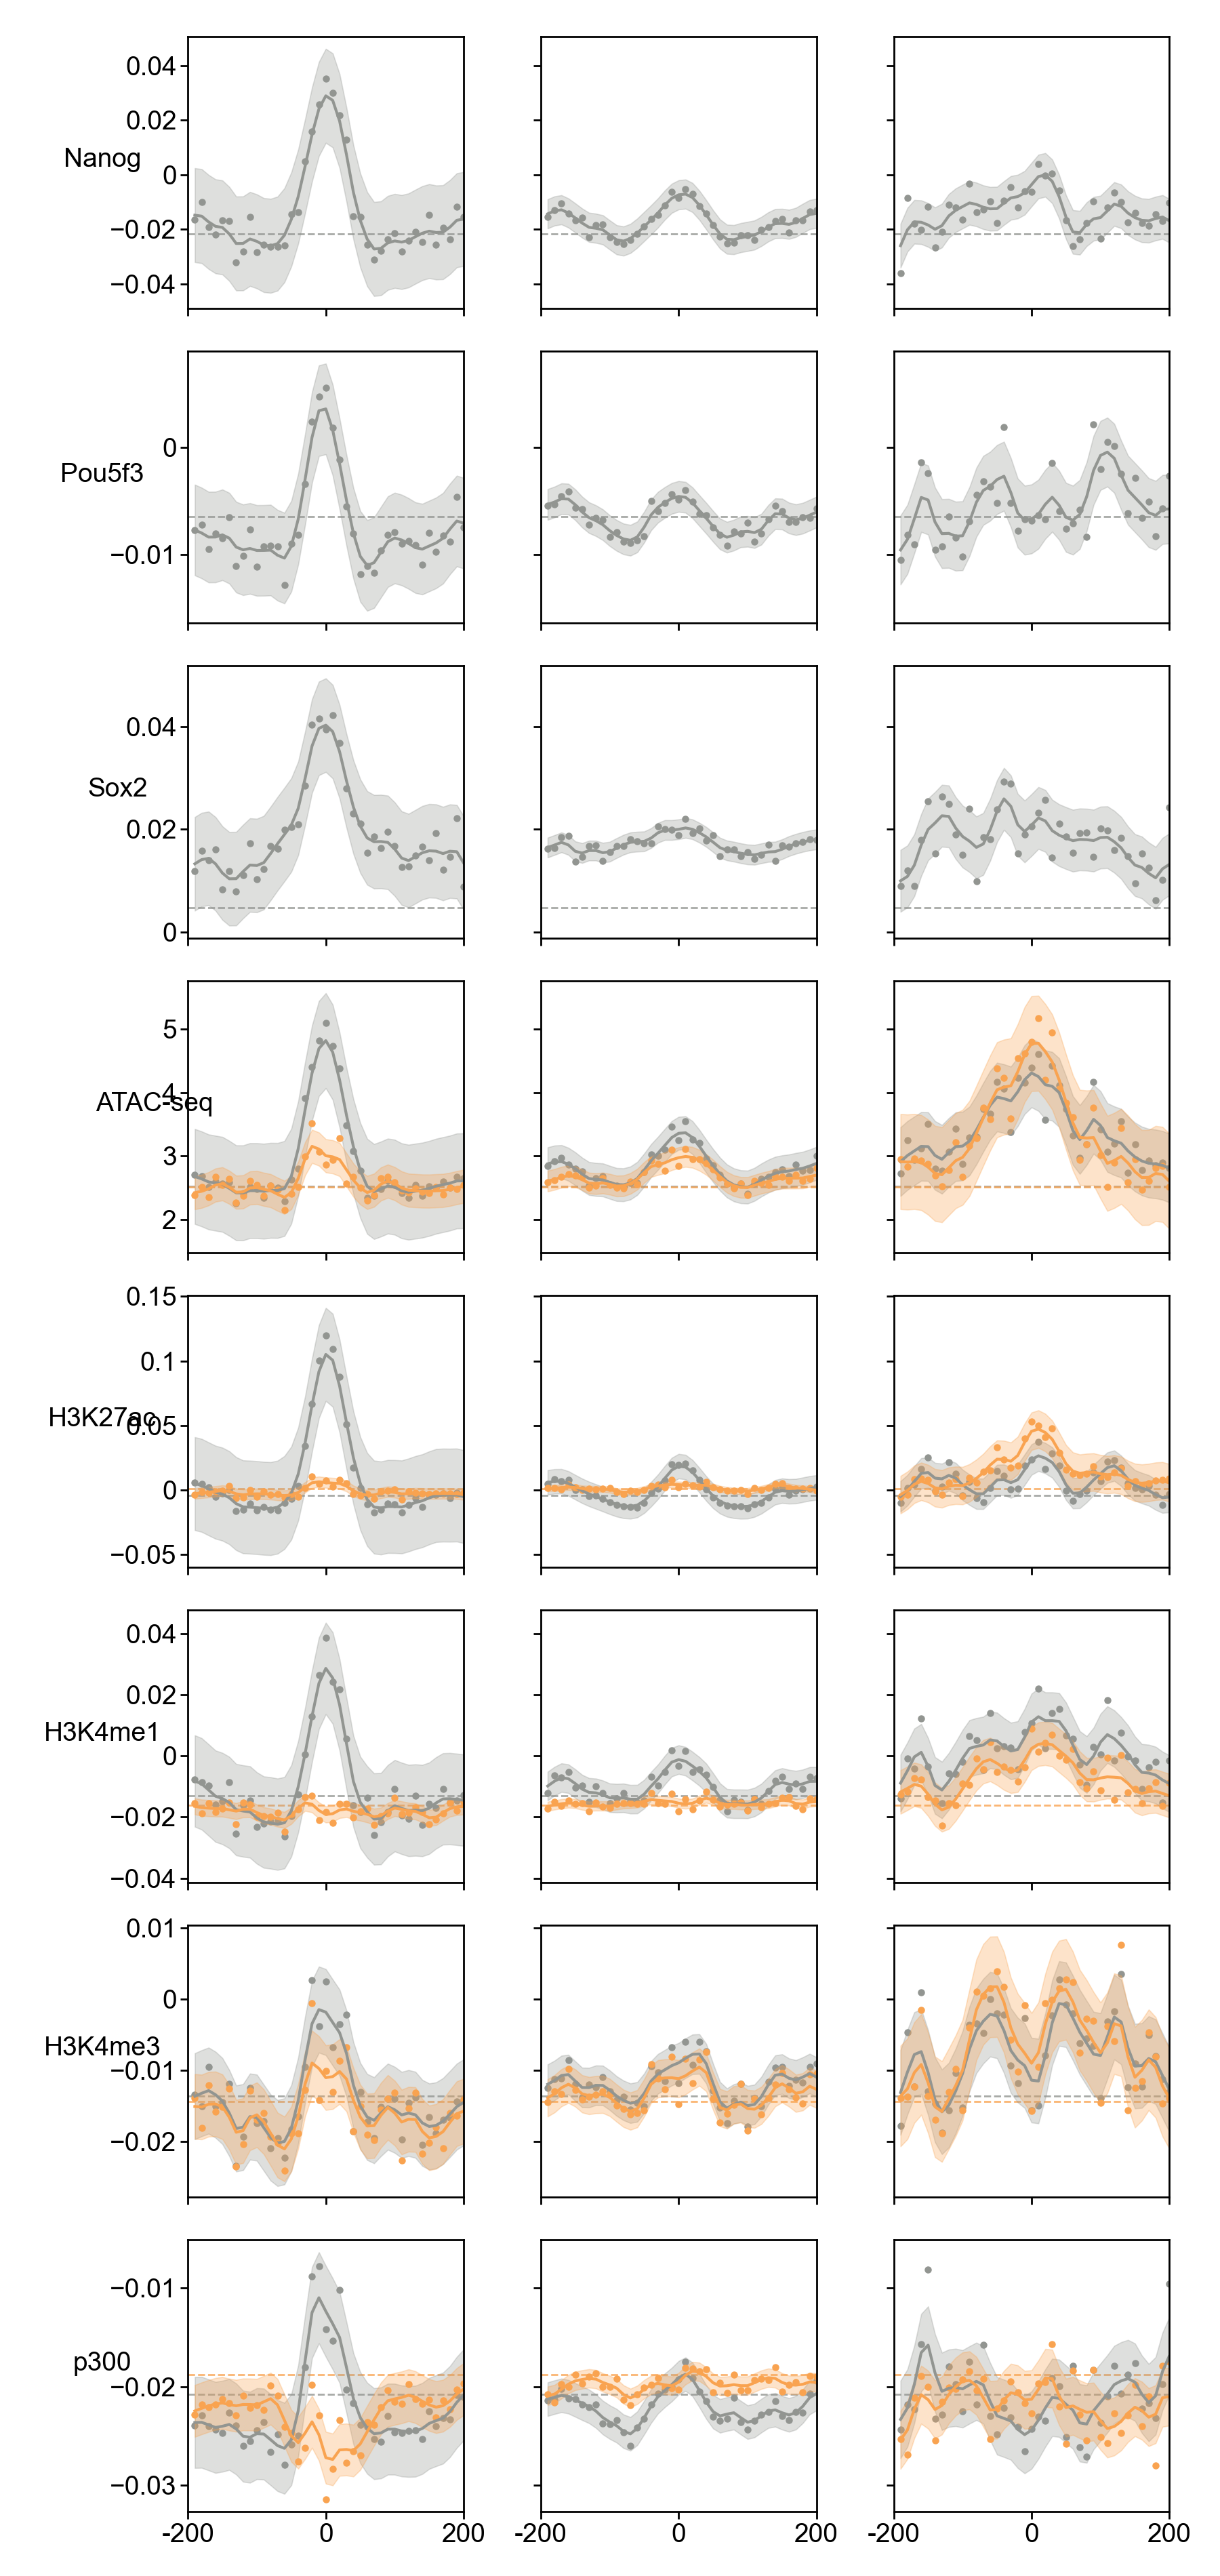

In [8]:
##########
# First three rows of the plot; sox/pou/nanog binding:
##########
ylabel = "log2(ChIP/input)"
i_row_offset = 0
tracks = [
    "log2ratio_Nanog-like_4.5hpf_Xu2012_R1",
    "log2ratio_Pou5f3_4_Pou5f3-Myc-tag_inj_Miao2022_B1_EXP-Pou5f3-ChIP-seq-4h_SRX13823181_R1",  #'log2ratio_Pou5f1-Flag_late-blastula_Leichsenrin2013_R1',
    "log2ratio_Sox2_late-blastula_Leichsenrin2013_R1",
]
tracks_titles = ["Nanog", "Pou5f3", "Sox2"]

n_tracks_total = 8
n_conditions = 3
figsize = 3

f, axes = plt.subplots(
    n_tracks_total,
    n_conditions,
    figsize=[figsize * n_conditions, figsize * n_tracks_total - 5],
    sharex=True,
)  # , gridspec_kw={'hspace':0.15})

for i_row, track in enumerate(tracks):
    f_stack = f"{track}.npy"
    f_bg = f"{track}.bg"
    stack = stacks_bins[f_stack]
    bg = bgs_bins[f_bg]["value"].values
    title_stack = f_stack.replace(".npy", "")
    for i_col, (idx, label, color) in enumerate(conds):
        plot_profile(
            stack,
            bg,
            idx,
            ax=axes[i_row + i_row_offset, i_col],
            color=color,
            label=None,  # label,
            ylabel=tracks_titles,  # ylabel,
            run_zscore=False,
            flank=flank,
            resolution=binsize,
            ticks_step=flank,
            abline_y=True,
        )
        axes[i_row + i_row_offset, i_col].minorticks_off()

for i_row in range(len(tracks)):
    axes[i_row + i_row_offset, 0].set_ylabel(tracks_titles[i_row], rotation=0)
    axes[i_row + i_row_offset, 1].set_title(None)


##########
# ATAC-Seq row
##########
ylabel = "ATAC-Seq mean read count"
i_row_offset = 3
tracks = [["ATAC-seq_WT4_3_Gao_2022", "ATAC-seq_MZtriple4_3_Gao_2022"]]
tracks_titles = ["ATAC-seq"]
tracks_colors = [color_WT, color_MZTriple]
tracks_labels = ["WT", "MZtriple"]

for i_row, subtracks in enumerate(tracks):
    for i_track, track in enumerate(subtracks):
        color = tracks_colors[i_track]
        label = tracks_labels[i_track]
        f_stack = f"{track}.npy"
        f_bg = f"{track}.bg"
        stack = stacks_bins[f_stack]
        bg = bgs_bins[f_bg]["value"].values
        title_stack = f_stack.replace(".npy", "")
        for i_col, (idx, label, _) in enumerate(conds):
            plot_profile(
                stack,
                bg,
                idx,
                ax=axes[i_row + i_row_offset, i_col],
                color=color,
                label=None,  # label,
                ylabel=tracks_titles[0],  # ylabel,
                run_zscore=False,
                flank=flank,
                resolution=binsize,
                ticks_step=flank,
                abline_y=True,
            )
            axes[i_row + i_row_offset, i_col].minorticks_off()

for i_row in range(len(tracks)):
    axes[i_row + i_row_offset, 0].set_ylabel(tracks_titles[i_row], rotation=0)
    axes[i_row + i_row_offset, 1].set_title(None)


##########
# ChIP-Seq for factor rows
##########
ylabel = "log2(ChIP/input)"
i_row_offset = 4
tracks = [
    [
        "log2ratio_H3K27ac_4_WT_Miao2022_B1_EXP-H3K27ac-ChIP-seq-MZnps-4h_SRX13823124_R1",
        "log2ratio_H3K27ac_4_MZnps_Miao2022_B1_EXP-H3K27ac-ChIP-seq-MZnps-4h_SRX13823113_R1",
    ],
    [
        "log2ratio_H3K4me1_4_WT_Miao2022_B1_EXP-H3-and-histone-mod-ChIP-seq-MZnps-4h_SRX13823129_R1",
        "log2ratio_H3K4me1_4_MZnps_Miao2022_B1_EXP-H3-and-histone-mod-ChIP-seq-MZnps-4h_SRX13823092_R1",
    ],
    [
        "log2ratio_H3K4me3_4_WT_Miao2022_B1_EXP-H3-and-histone-mod-ChIP-seq-MZnps-4h_SRX13823130_R1",
        "log2ratio_H3K4me3_4_MZnps_Miao2022_B1_EXP-H3-and-histone-mod-ChIP-seq-MZnps-4h_SRX13823093_R1",
    ],
    [
        "log2ratio_p300_4_WT_Miao2022_B1_EXP-p300-and-histone-ac-ChIP-seq-MZnps-4h_SRX13823125_R1",
        "log2ratio_p300_4_MZnps_Miao2022_B1_EXP-p300-and-histone-ac-ChIP-seq-MZnps-4h_SRX13823119_R1",
    ],
]
tracks_titles = ["H3K27ac", "H3K4me1", "H3K4me3", "p300"]

tracks_colors = [color_WT, color_MZTriple]
tracks_labels = ["WT", "MZtriple"]

for i_row, subtracks in enumerate(tracks):
    for i_track, track in enumerate(subtracks):
        color = tracks_colors[i_track]
        label = tracks_labels[i_track]
        title = tracks_titles[i_track]
        f_stack = f"{track}.npy"
        f_bg = f"{track}.bg"
        stack = stacks_bins[f_stack]
        bg = bgs_bins[f_bg]["value"].values
        title_stack = f_stack.replace(".npy", "")
        for i_col, (idx, label, _) in enumerate(conds):
            plot_profile(
                stack,
                bg,
                idx,
                ax=axes[i_row + i_row_offset, i_col],
                color=color,
                label=None,  # label,
                ylabel=title,  # ylabel,
                run_zscore=False,
                flank=flank,
                resolution=binsize,
                ticks_step=flank,
                abline_y=True,
            )
            axes[i_row + i_row_offset, i_col].minorticks_off()

for i_row in range(len(tracks)):
    axes[i_row + i_row_offset, 0].set_ylabel(tracks_titles[i_row], rotation=0)
    axes[i_row + i_row_offset, 1].set_title(None)


for i_row in range(n_tracks_total):
    # axes[i_row, 0].get_shared_y_axes().join(axes[i_row, 0], *axes[i_row, 1:])
    ylims = np.array(
        [
            axes[i_row, 0].get_ylim(),
            axes[i_row, 1].get_ylim(),
            axes[i_row, 2].get_ylim(),
        ]
    )

    ylim_min = np.min(ylims, axis=0)[0]
    ylim_max = np.max(ylims, axis=0)[1]

    axes[i_row, 0].sharey(axes[i_row, 1])
    axes[i_row, 1].sharey(axes[i_row, 2])
    axes[i_row, 0].set_ylim(ylim_min, ylim_max)

for i_col in range(1, n_conditions):
    for i_row in range(n_tracks_total):
        axes[i_row, i_col].set_yticklabels([])

f.subplots_adjust(left=0.15, top=0.95)
f.tight_layout()

if do_save:
    prefix = f"{output_folder}/Fig3E.profiles.WT-TR-diff"
    f.savefig(f"{prefix}.pdf")
    f.savefig(f"{prefix}.png")

In [9]:
output_data = []

##########
# First three rows of the plot; sox/pou/nanog binding:
##########
ylabel = "log2(ChIP/input)"
i_row_offset = 0
tracks = [
    "log2ratio_Nanog-like_4.5hpf_Xu2012_R1",
    "log2ratio_Pou5f3_4_Pou5f3-Myc-tag_inj_Miao2022_B1_EXP-Pou5f3-ChIP-seq-4h_SRX13823181_R1",  #'log2ratio_Pou5f1-Flag_late-blastula_Leichsenrin2013_R1',
    "log2ratio_Sox2_late-blastula_Leichsenrin2013_R1",
]
tracks_titles = ["Nanog", "Pou5f3", "Sox2"]

for i_row, track in enumerate(tracks):
    f_stack = f"{track}.npy"
    f_bg = f"{track}.bg"
    stack = stacks_bins[f_stack]
    bg = bgs_bins[f_bg]["value"].values
    title_stack = f_stack.replace(".npy", "")
    for i_col, (idx, label, color) in enumerate(conds):
        x, y_mean, y_smooth, y_std_smooth, bg_mean = plot_profile(
            stack, bg, idx, run_zscore=False, return_source_data=True
        )
        df_output = pd.DataFrame(
            {
                "x": x * binsize - flank - binsize,
                "y_mean": y_mean,
                "y_smoothed": y_smooth,
                "y_std_smoothed": y_std_smooth,
                "bg": bg_mean,
            }
        ).T
        df_output.loc[:, "track"] = track
        df_output.loc[:, "label"] = label
        df_output.loc[:, "ylabel"] = ylabel

        output_data.append(df_output.copy())

##########
# ATAC-Seq row
##########
ylabel = "ATAC-Seq mean read count"
i_row_offset = 3
tracks = [["ATAC-seq_WT4_3_Gao_2022", "ATAC-seq_MZtriple4_3_Gao_2022"]]
tracks_titles = ["ATAC-seq"]
tracks_colors = [color_WT, color_MZTriple]
tracks_labels = ["WT", "MZtriple"]

for i_row, subtracks in enumerate(tracks):
    for i_track, track in enumerate(subtracks):
        color = tracks_colors[i_track]
        label = tracks_labels[i_track]
        f_stack = f"{track}.npy"
        f_bg = f"{track}.bg"
        stack = stacks_bins[f_stack]
        bg = bgs_bins[f_bg]["value"].values
        title_stack = f_stack.replace(".npy", "")
        for i_col, (idx, label, _) in enumerate(conds):
            x, y_mean, y_smooth, y_std_smooth, bg_mean = plot_profile(
                stack, bg, idx, run_zscore=False, return_source_data=True
            )
            df_output = pd.DataFrame(
                {
                    "x": x * binsize - flank - binsize,
                    "y_mean": y_mean,
                    "y_smoothed": y_smooth,
                    "y_std_smoothed": y_std_smooth,
                    "bg": bg_mean,
                }
            ).T
            df_output.loc[:, "track"] = track
            df_output.loc[:, "label"] = label
            df_output.loc[:, "ylabel"] = ylabel

            output_data.append(df_output.copy())

##########
# ChIP-Seq for factor rows
##########
ylabel = "log2(ChIP/input)"
i_row_offset = 4
tracks = [
    [
        "log2ratio_H3K27ac_4_WT_Miao2022_B1_EXP-H3K27ac-ChIP-seq-MZnps-4h_SRX13823124_R1",
        "log2ratio_H3K27ac_4_MZnps_Miao2022_B1_EXP-H3K27ac-ChIP-seq-MZnps-4h_SRX13823113_R1",
    ],
    [
        "log2ratio_H3K4me1_4_WT_Miao2022_B1_EXP-H3-and-histone-mod-ChIP-seq-MZnps-4h_SRX13823129_R1",
        "log2ratio_H3K4me1_4_MZnps_Miao2022_B1_EXP-H3-and-histone-mod-ChIP-seq-MZnps-4h_SRX13823092_R1",
    ],
    [
        "log2ratio_H3K4me3_4_WT_Miao2022_B1_EXP-H3-and-histone-mod-ChIP-seq-MZnps-4h_SRX13823130_R1",
        "log2ratio_H3K4me3_4_MZnps_Miao2022_B1_EXP-H3-and-histone-mod-ChIP-seq-MZnps-4h_SRX13823093_R1",
    ],
    [
        "log2ratio_p300_4_WT_Miao2022_B1_EXP-p300-and-histone-ac-ChIP-seq-MZnps-4h_SRX13823125_R1",
        "log2ratio_p300_4_MZnps_Miao2022_B1_EXP-p300-and-histone-ac-ChIP-seq-MZnps-4h_SRX13823119_R1",
    ],
]
tracks_titles = ["H3K27ac", "H3K4me1", "H3K4me3", "p300"]

tracks_colors = [color_WT, color_MZTriple]
tracks_labels = ["WT", "MZtriple"]

for i_row, subtracks in enumerate(tracks):
    for i_track, track in enumerate(subtracks):
        color = tracks_colors[i_track]
        label = tracks_labels[i_track]
        title = tracks_titles[i_track]
        f_stack = f"{track}.npy"
        f_bg = f"{track}.bg"
        stack = stacks_bins[f_stack]
        bg = bgs_bins[f_bg]["value"].values
        title_stack = f_stack.replace(".npy", "")
        for i_col, (idx, label, _) in enumerate(conds):
            x, y_mean, y_smooth, y_std_smooth, bg_mean = plot_profile(
                stack, bg, idx, run_zscore=False, return_source_data=True
            )
            df_output = pd.DataFrame(
                {
                    "x": x * binsize - flank - binsize,
                    "y_mean": y_mean,
                    "y_smoothed": y_smooth,
                    "y_std_smoothed": y_std_smooth,
                    "bg": bg_mean,
                }
            ).T
            df_output.loc[:, "track"] = track
            df_output.loc[:, "label"] = label
            df_output.loc[:, "ylabel"] = ylabel

            output_data.append(df_output.copy())

In [10]:
output_data = pd.concat(output_data)

if do_save:
    prefix = f"{output_folder}/Fig3E.profiles.WT-TR-diff"
    output_data.to_csv(f"{prefix}.source.csv", sep="\t")

In [11]:
section_flush()

✅ Section cleaned


### + Hi-C pileups (Fig. 3E top)

In [12]:
section_start()

✅ Section started


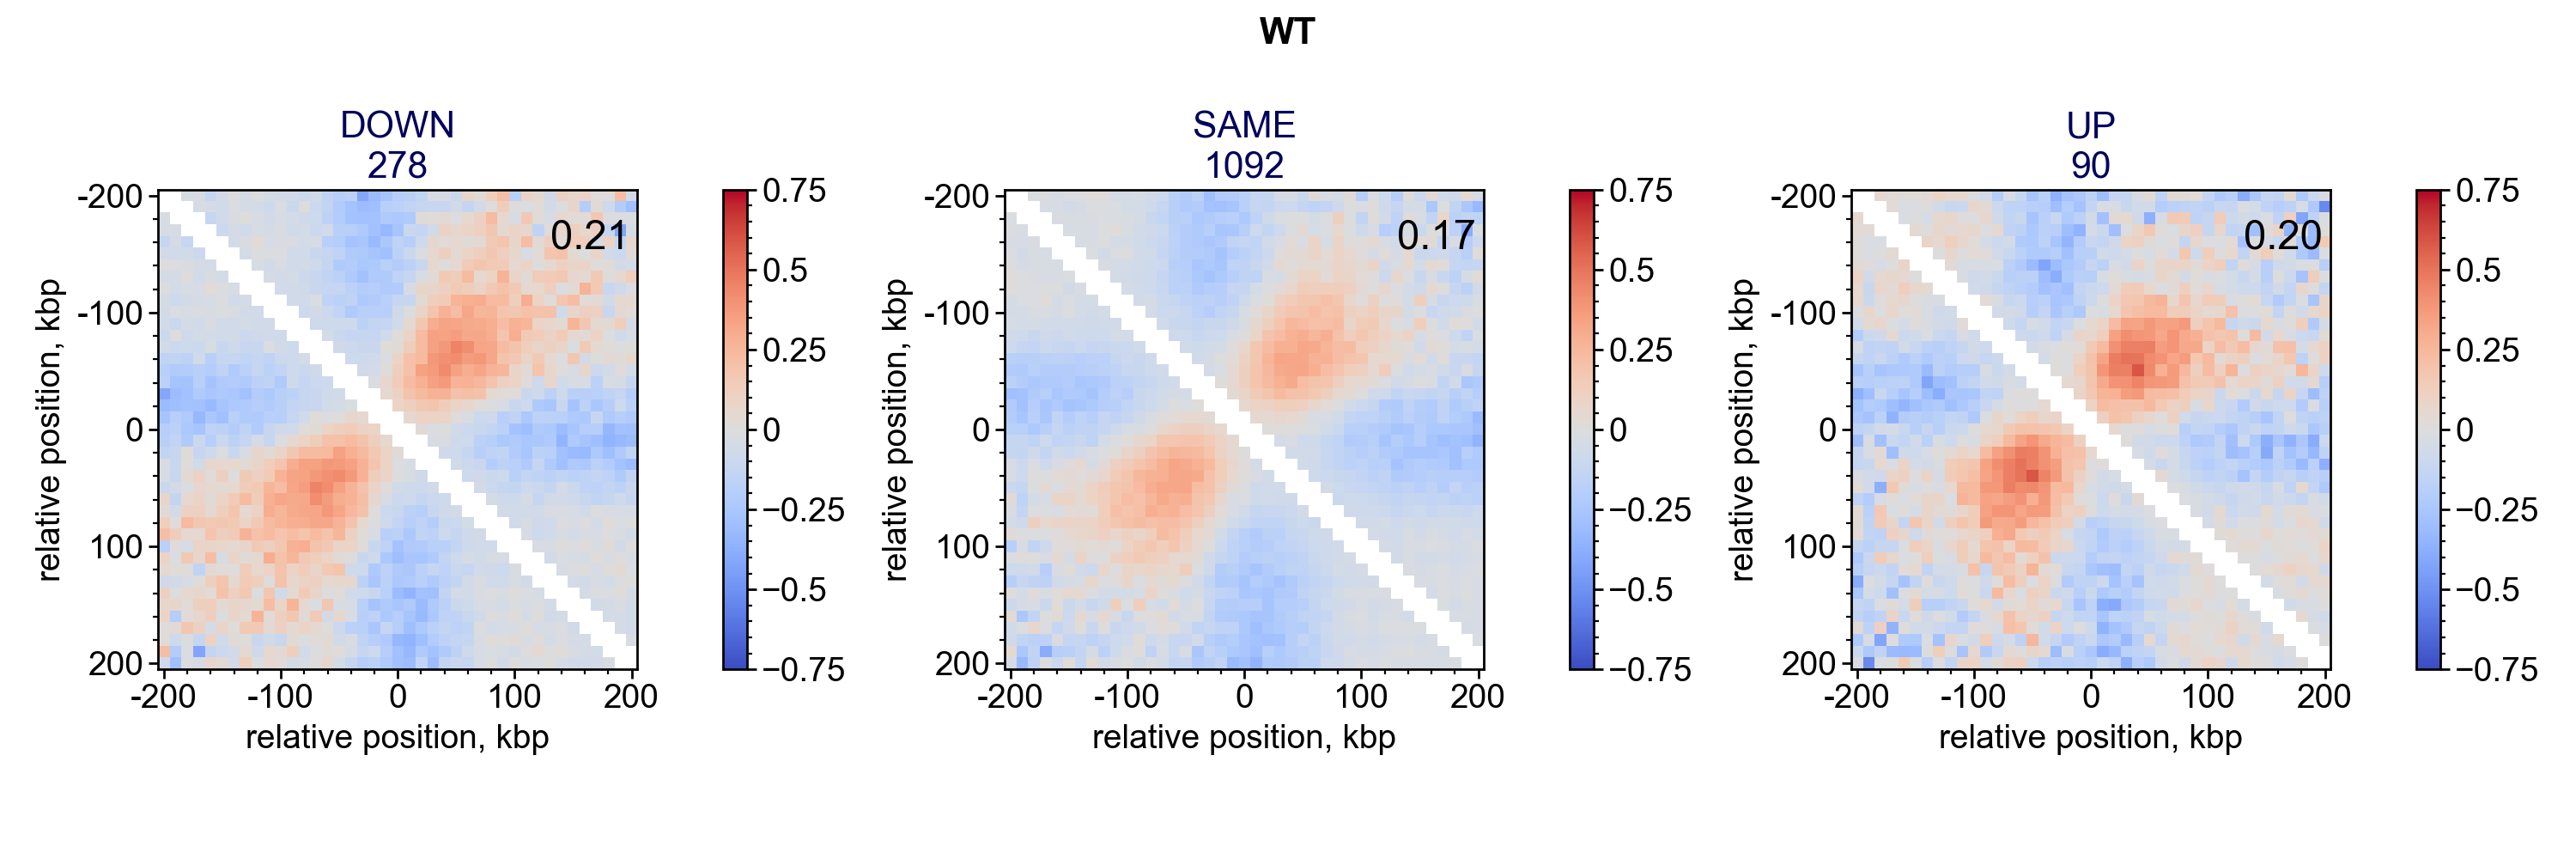

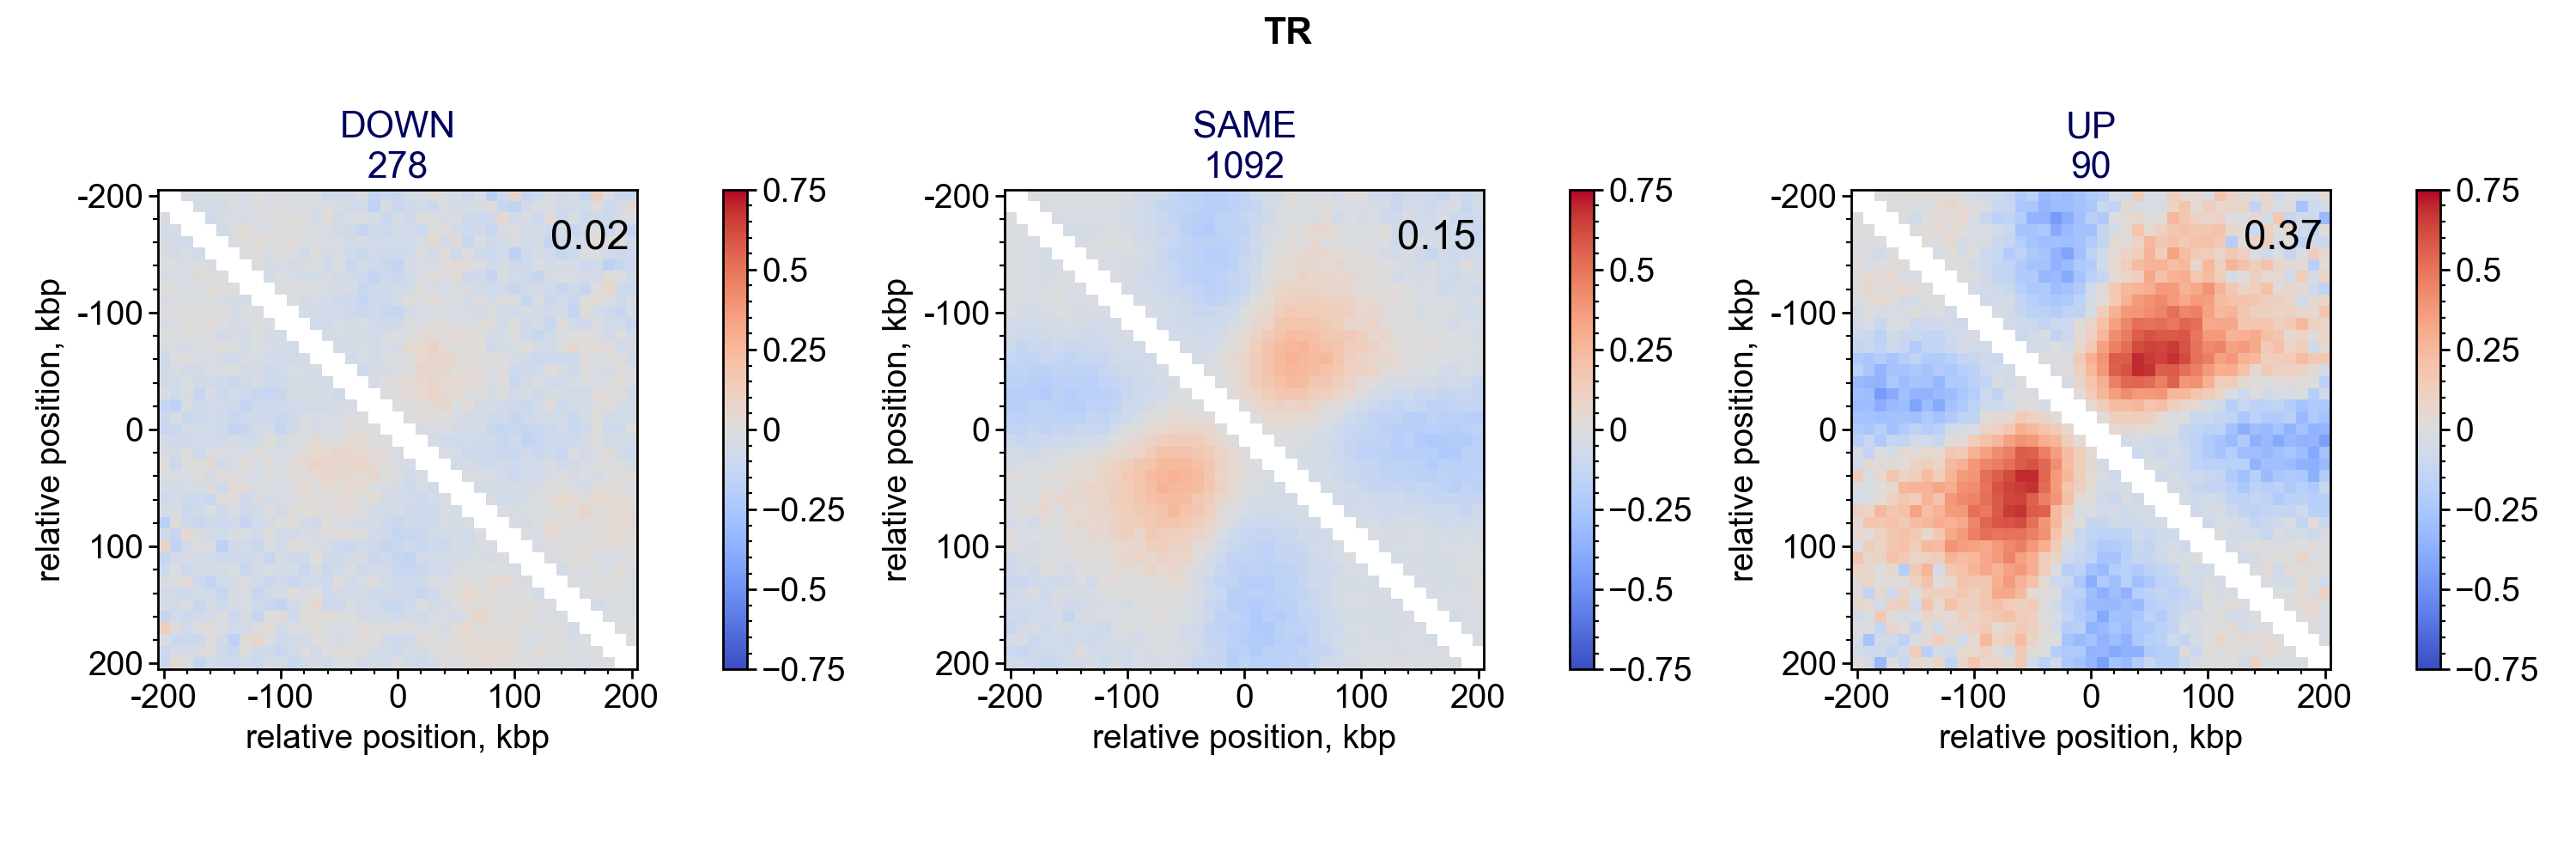

In [13]:
# Save the Hi-C pileups
titles = [
    "DOWN",
    "SAME",
    "UP",
]
idxs = [
    df_fount_differential.query('diff_TR_vs_WT=="down"').index,
    df_fount_differential.query('diff_TR_vs_WT=="same"').index,
    df_fount_differential.query('diff_TR_vs_WT=="up"').index,
]
flank = 200_000
for source_fountains in ["WT", "TR"]:

    stacks_list = dct_stacks_hic[source_fountains]

    f = plot_pileups(
        stacks_list,
        idxs,
        titles,
        nrows=1,
        ncols=3,
        flank=flank,
        resolution=binsize,
        figsize=(15, 5),
        vmin=-0.75,
        vmax=0.75,
        reduce_ticks=False,
        cmap="coolwarm",
        avscore=df_fountain_strength[source_fountains],
        add_counts=True,
    )

    f.suptitle(source_fountains)

    if do_save:
        prefix = f"{output_folder}/Fig3E.pileups.diff-fount.{source_fountains}"
        f.savefig(f"{prefix}.pdf")
        f.savefig(f"{prefix}.png")

In [14]:
# Save the Hi-C pileups
titles = [
    "DOWN",
    "SAME",
    "UP",
]
idxs = [
    df_fount_differential.query('diff_TR_vs_WT=="down"').index,
    df_fount_differential.query('diff_TR_vs_WT=="same"').index,
    df_fount_differential.query('diff_TR_vs_WT=="up"').index,
]

datasets_pileupds = {}

for source_fountains in ["WT", "TR"]:

    stacks_list = dct_stacks_hic[source_fountains]

    data_pileups = plot_pileups(
        stacks_list,
        idxs,
        titles,
        avscore=df_fountain_strength[source_fountains],
        return_source_data=True,
    )

    datasets_pileupds[source_fountains] = data_pileups

In [15]:
if do_save:

    for source_fountains in ["WT", "TR"]:
        data_pileups = datasets_pileupds[source_fountains]

        for data in data_pileups:

            df_tmp = pd.DataFrame(data[2])
            df_tmp.insert(loc=0, column="fountain score", value=data[1])
            df_tmp.insert(loc=0, column="label", value=data[0])
            df_tmp.insert(loc=0, column="source_fountains", value=source_fountains)

            prefix = (
                f"{output_folder}/Fig3E.pileups.diff-fount.{source_fountains}.{data[0]}"
            )
            df_tmp.to_csv(f"{prefix}.source.tsv", sep="\t")

In [16]:
section_flush()

✅ Section cleaned


### + Hi-C pileups, replicate 2 of 5.3 WT and 11 hpf (Fig. 4A)

In [17]:
section_start()

✅ Section started


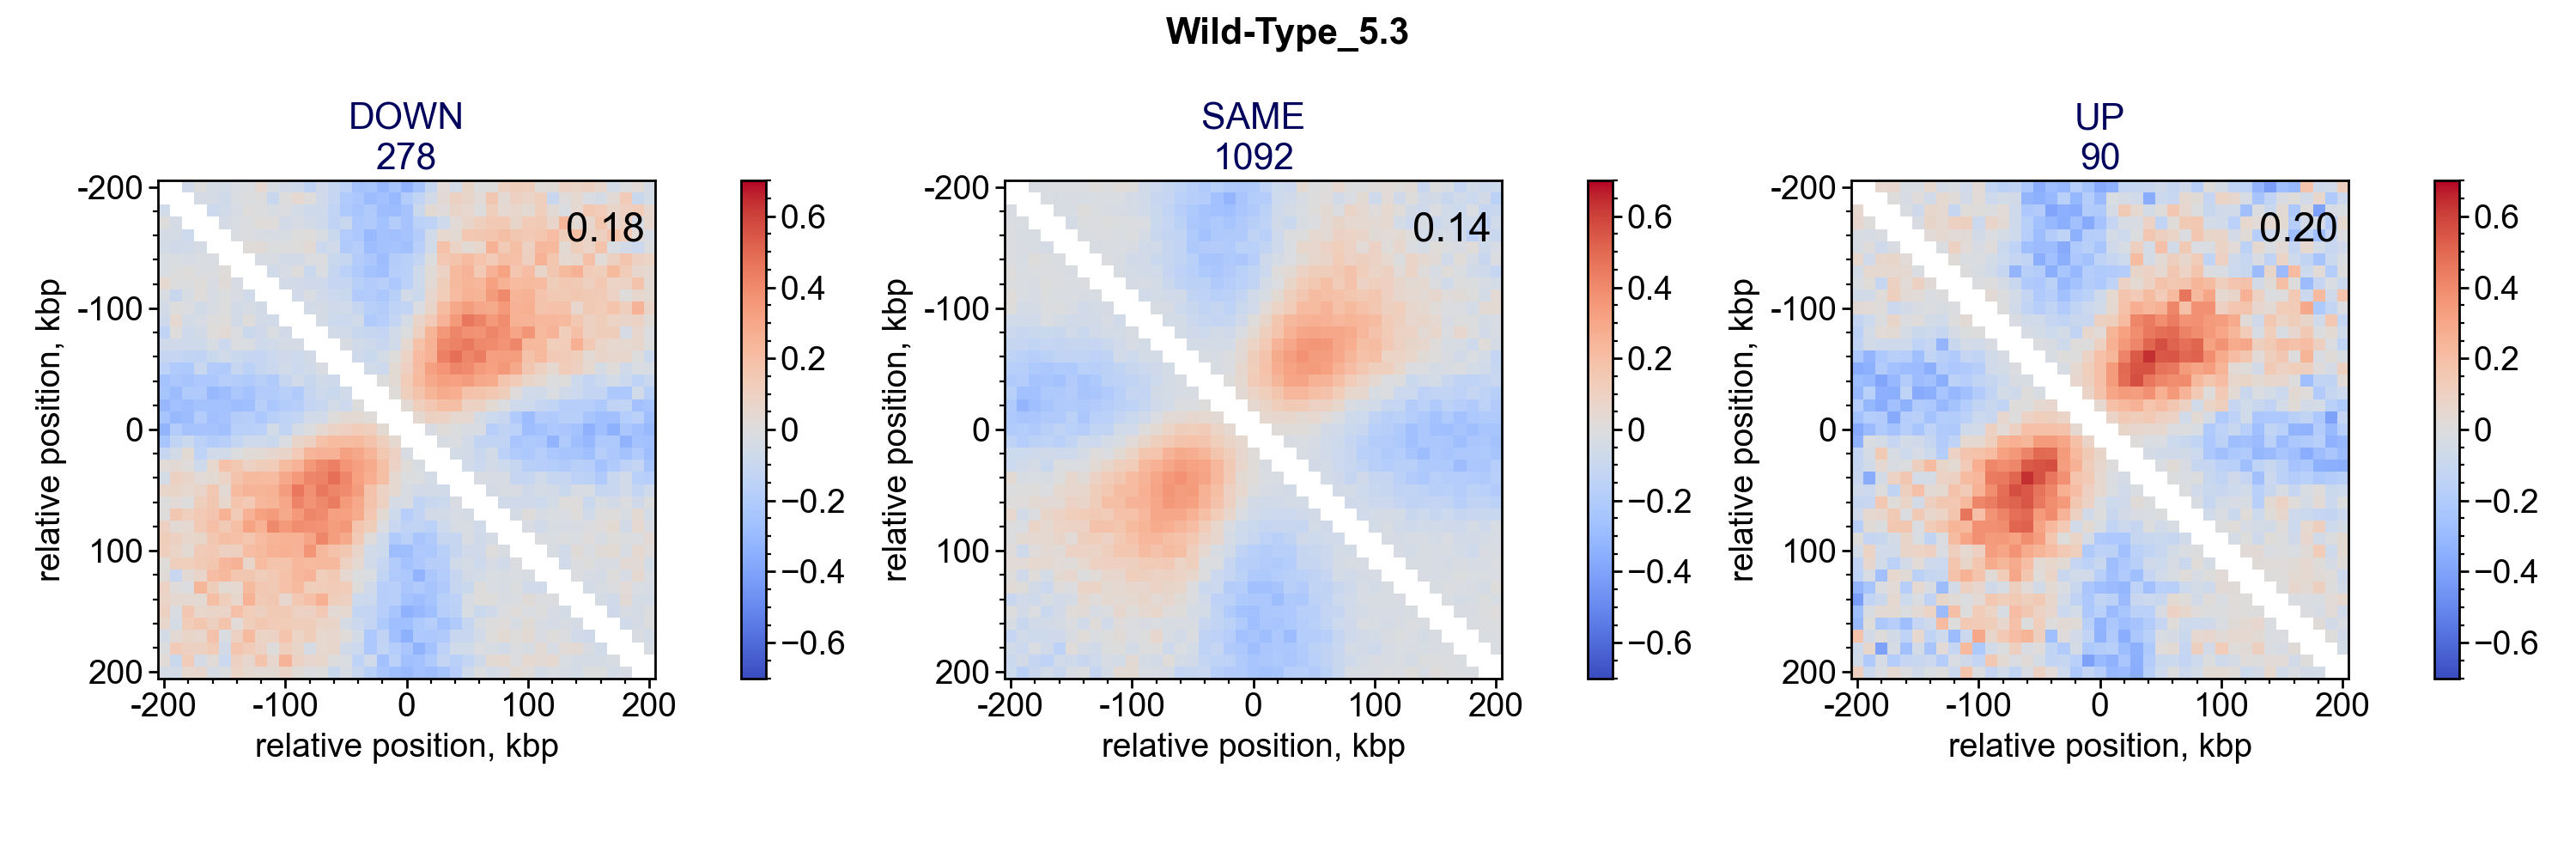

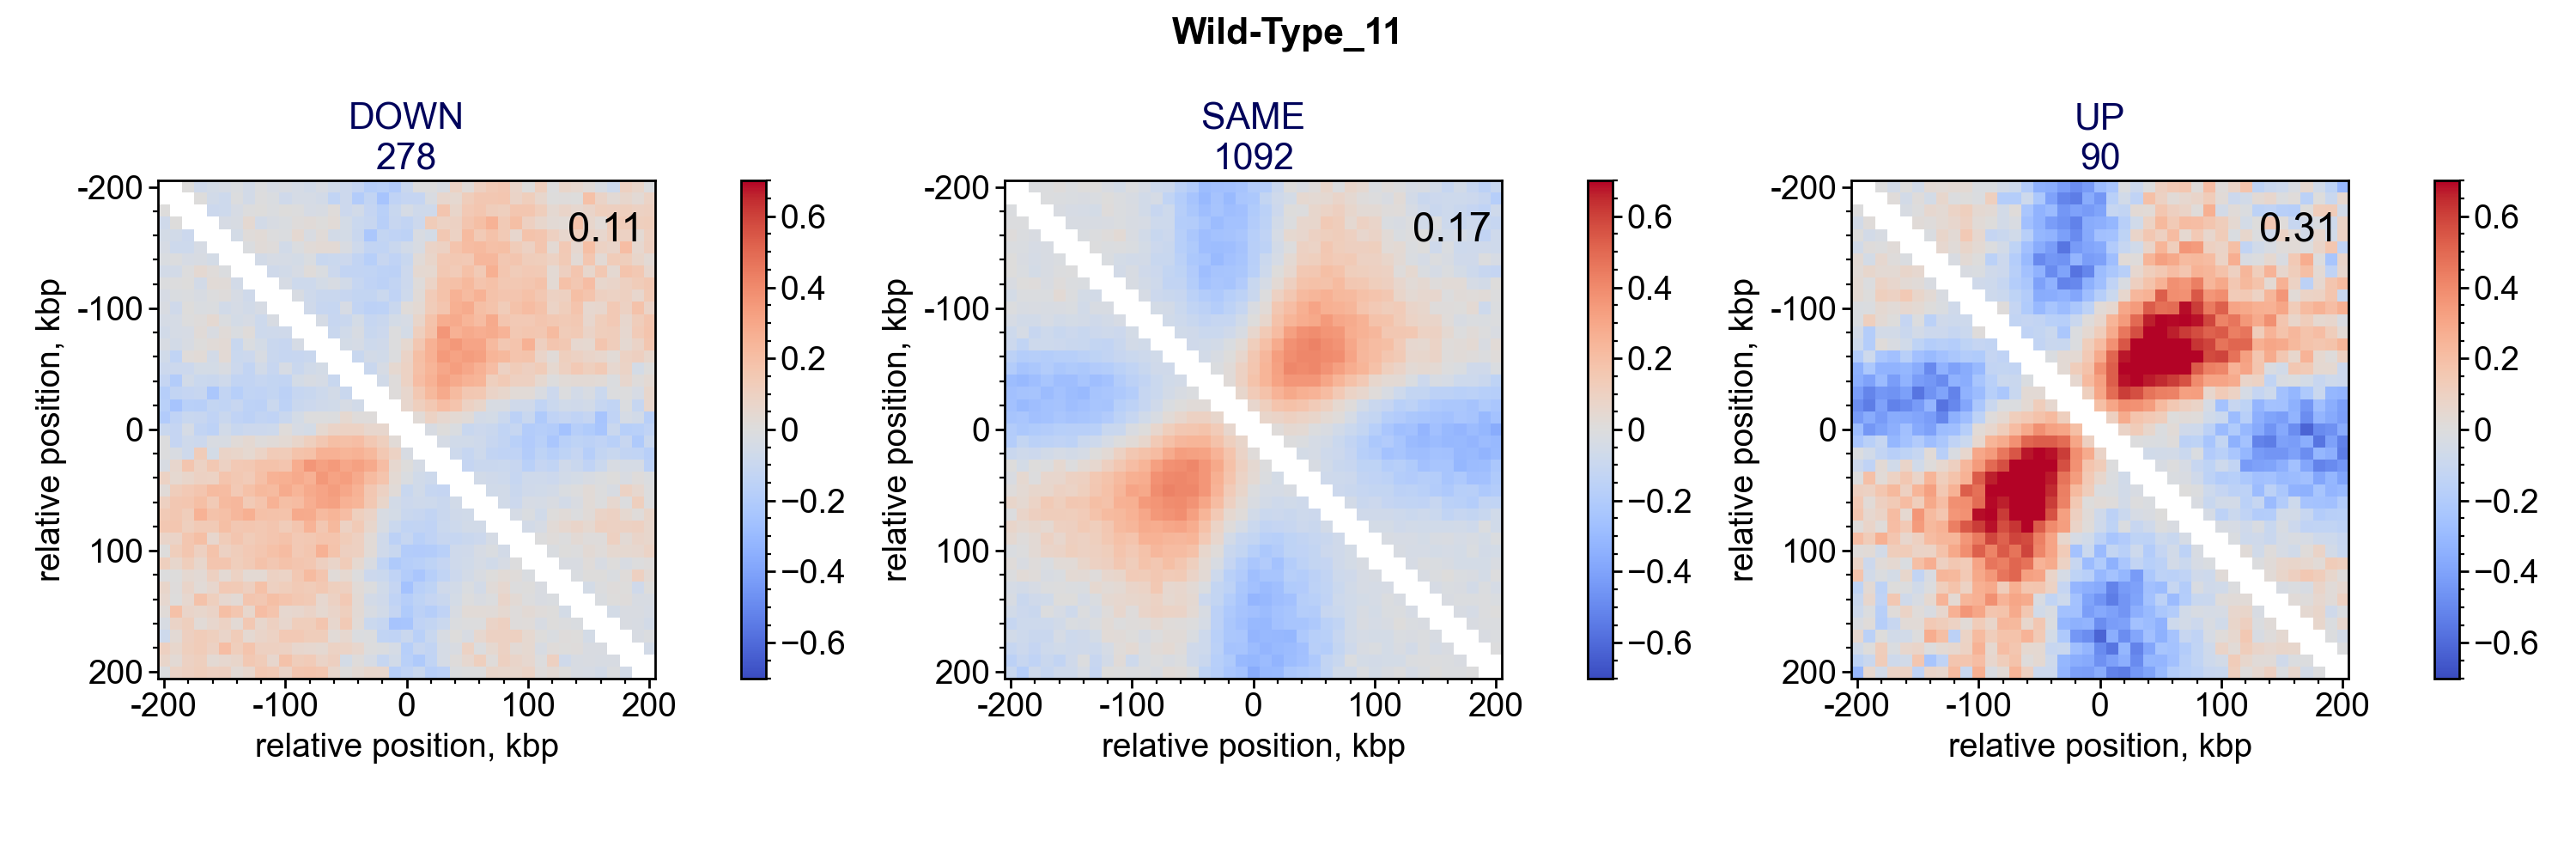

In [18]:
# Save the Hi-C pileups
titles = [
    "DOWN",
    "SAME",
    "UP",
]
idxs = [
    df_fount_differential.query('diff_TR_vs_WT=="down"').index,
    df_fount_differential.query('diff_TR_vs_WT=="same"').index,
    df_fount_differential.query('diff_TR_vs_WT=="up"').index,
]
flank = 200_000
for source_fountains in ["Wild-Type_5.3", "Wild-Type_11"]:

    stacks_list = dct_stacks_hic[source_fountains]

    f = plot_pileups(
        stacks_list,
        idxs,
        titles,
        nrows=1,
        ncols=3,
        flank=flank,
        resolution=binsize,
        figsize=(15, 5),
        vmin=-0.7,
        vmax=0.7,
        reduce_ticks=False,
        cmap="coolwarm",
        avscore=df_fountain_strength[source_fountains],
        add_counts=True,
    )

    f.suptitle(source_fountains)

    if do_save:
        prefix = f"{output_folder}/Fig4A.pileups.diff-fount.{source_fountains}"
        f.savefig(f"{prefix}.pdf")
        f.savefig(f"{prefix}.png")

In [19]:
# Save the Hi-C pileups
titles = [
    "DOWN",
    "SAME",
    "UP",
]
idxs = [
    df_fount_differential.query('diff_TR_vs_WT=="down"').index,
    df_fount_differential.query('diff_TR_vs_WT=="same"').index,
    df_fount_differential.query('diff_TR_vs_WT=="up"').index,
]

datasets_pileupds = {}

for source_fountains in ["Wild-Type_5.3", "Wild-Type_11"]:

    stacks_list = dct_stacks_hic[source_fountains]

    data_pileups = plot_pileups(
        stacks_list,
        idxs,
        titles,
        avscore=df_fountain_strength[source_fountains],
        return_source_data=True,
    )

    datasets_pileupds[source_fountains] = data_pileups

In [20]:
if do_save:

    for source_fountains in ["Wild-Type_5.3", "Wild-Type_11"]:
        data_pileups = datasets_pileupds[source_fountains]

        for data in data_pileups:

            df_tmp = pd.DataFrame(data[2])
            df_tmp.insert(loc=0, column="fountain score", value=data[1])
            df_tmp.insert(loc=0, column="label", value=data[0])
            df_tmp.insert(loc=0, column="source_fountains", value=source_fountains)

            prefix = (
                f"{output_folder}/Fig4A.pileups.diff-fount.{source_fountains}.{data[0]}"
            )
            df_tmp.to_csv(f"{prefix}.source.tsv", sep="\t")

In [21]:
section_flush()

✅ Section cleaned


### + Replication timing (Fig. 4B)

In [22]:
section_start()

✅ Section started


In [23]:
from lib.read_nonstandard import *

[04:41:36] lib:INFO: Collecting epigenetic stacks (500 Kb flank)
[04:42:32] lib:INFO: Loaded 224 stacks (500 Kb flank)
[04:42:32] lib:INFO: Collecting epigenetic stacks (1 Mb flank)
[04:44:11] lib:INFO: Loaded 180 stacks (1 Mb flank)
[04:44:11] lib:INFO: Loading 500 Kb snippet stacks for WT


In [24]:
toplot = [
    (
        0,
        "512",
        df_fount_differential.query('diff_TR_vs_WT=="down"').index,
        "DOWN",
        color_fount_down,
    ),
    (
        0,
        "512",
        df_fount_differential.query('diff_TR_vs_WT=="same"').index,
        "SAME",
        color_fount_same,
    ),
    (
        0,
        "512",
        df_fount_differential.query('diff_TR_vs_WT=="up"').index,
        "UP",
        color_fount_up,
    ),
    (
        1,
        "dome",
        df_fount_differential.query('diff_TR_vs_WT=="down"').index,
        "DOWN",
        color_fount_down,
    ),
    (
        1,
        "dome",
        df_fount_differential.query('diff_TR_vs_WT=="same"').index,
        "SAME",
        color_fount_same,
    ),
    (
        1,
        "dome",
        df_fount_differential.query('diff_TR_vs_WT=="up"').index,
        "UP",
        color_fount_up,
    ),
    (
        2,
        "bud",
        df_fount_differential.query('diff_TR_vs_WT=="down"').index,
        "DOWN",
        color_fount_down,
    ),
    (
        2,
        "bud",
        df_fount_differential.query('diff_TR_vs_WT=="same"').index,
        "SAME",
        color_fount_same,
    ),
    (
        2,
        "bud",
        df_fount_differential.query('diff_TR_vs_WT=="up"').index,
        "UP",
        color_fount_up,
    ),
    (
        3,
        "28",
        df_fount_differential.query('diff_TR_vs_WT=="down"').index,
        "DOWN",
        color_fount_down,
    ),
    (
        3,
        "28",
        df_fount_differential.query('diff_TR_vs_WT=="same"').index,
        "SAME",
        color_fount_same,
    ),
    (
        3,
        "28",
        df_fount_differential.query('diff_TR_vs_WT=="up"').index,
        "UP",
        color_fount_up,
    ),
]

In [25]:
flank = 1_000_000
ticks_sep = 1_000_000

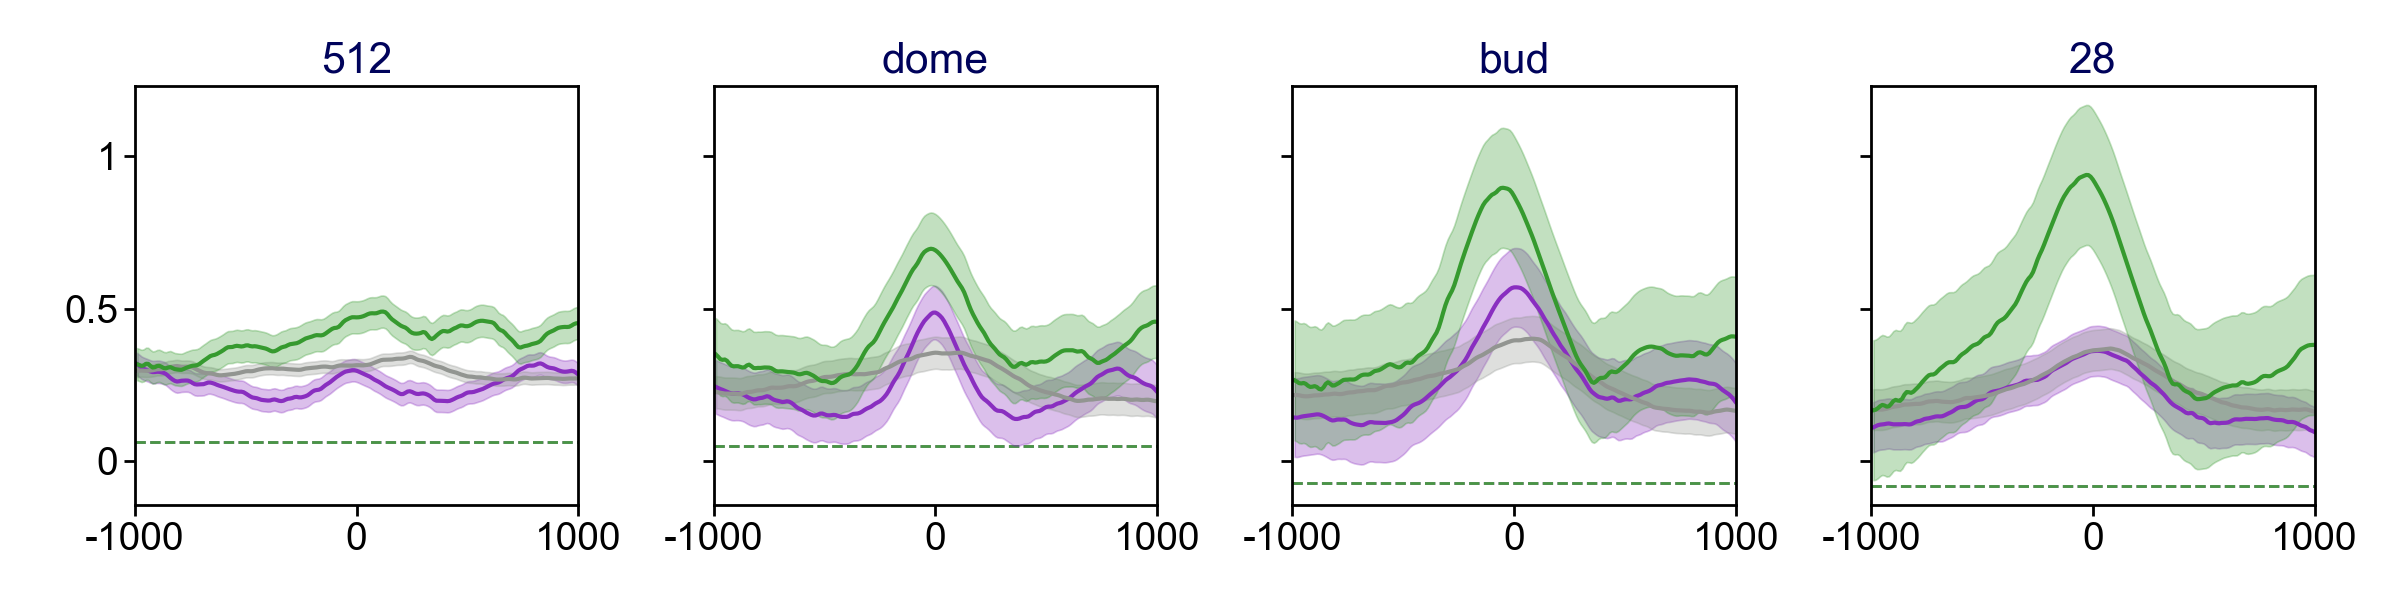

In [26]:
##########
# First three rows of the plot; sox/pou/nanog binding:
##########
ylabel = "log2(ChIP/input)"

figsize = 3

f, axes = plt.subplots(
    1, 4, figsize=[figsize * 4, figsize * 1], sharey=True, sharex=True
)

for i, (i_ax, track, idx, label, color) in enumerate(toplot):
    f_stack = f"{track}.npy"
    f_bg = f"{track}.bg"
    stack = stacks_bins_1Mb[f_stack]
    bg = bgs_bins[f_bg]["value"].values
    title_stack = f_stack.replace(".npy", "")
    ax = axes[i_ax]

    plot_profile(
        stack,
        bg,
        idx,
        ax=ax,
        color=color,
        label=label,
        ylabel=ylabel,
        run_zscore=False,
        flank=flank,
        resolution=binsize,
        ticks_step=ticks_sep,
        abline_y=True,
        scatter=False,
        run_smooth=True,
    )
    ax.set_title(track)
    ax.minorticks_off()

f.subplots_adjust(left=0.15, top=0.95)
f.tight_layout()

if do_save:
    prefix = f"{output_folder}/Fig4B.profiles-RT.WT-TR-diff"
    f.savefig(f"{prefix}.pdf")
    f.savefig(f"{prefix}.png")

In [27]:
output_data = []

##########
# First three rows of the plot; sox/pou/nanog binding:
##########
ylabel = "log2(ChIP/input)"

output_data = []

for i, (i_ax, track, idx, label, color) in enumerate(toplot):
    f_stack = f"{track}.npy"
    f_bg = f"{track}.bg"
    stack = stacks_bins_1Mb[f_stack]
    bg = bgs_bins[f_bg]["value"].values
    title_stack = f_stack.replace(".npy", "")

    x, y_mean, y_smooth, y_std_smooth, bg_mean = plot_profile(
        stack,
        bg,
        idx,
        run_zscore=False,
        run_smooth=True,
        return_source_data=True,
    )

    df_output = pd.DataFrame(
        {
            "x": x * binsize - flank - binsize,
            "y_mean": y_mean,
            "y_smoothed": y_smooth,
            "y_std_smoothed": y_std_smooth,
            "bg": bg_mean,
        }
    ).T
    df_output.loc[:, "track"] = track
    df_output.loc[:, "label"] = label
    df_output.loc[:, "ylabel"] = ylabel

    output_data.append(df_output.copy())

In [28]:
output_data = pd.concat(output_data)

if do_save:
    prefix = f"{output_folder}/Fig4B.profiles-RT.WT-TR-diff"
    output_data.to_csv(f"{prefix}.source.csv", sep="\t")

In [29]:
section_flush()

✅ Section cleaned


### + Additional epigenetics (Fig. 4C)

In [30]:
section_start()

✅ Section started


In [31]:
toplot = [
    (
        0,
        "log2ratio_H3K27ac_4_WT_Miao2022_B1_EXP-H3K27ac-ChIP-seq-MZnps-4h_SRX13823124_R1",
        df_fount_differential.query('diff_TR_vs_WT=="down"').index,
        "DOWN",
        color_fount_down,
    ),
    (
        0,
        "log2ratio_H3K27ac_4_WT_Miao2022_B1_EXP-H3K27ac-ChIP-seq-MZnps-4h_SRX13823124_R1",
        df_fount_differential.query('diff_TR_vs_WT=="same"').index,
        "SAME",
        color_fount_same,
    ),
    (
        0,
        "log2ratio_H3K27ac_4_WT_Miao2022_B1_EXP-H3K27ac-ChIP-seq-MZnps-4h_SRX13823124_R1",
        df_fount_differential.query('diff_TR_vs_WT=="up"').index,
        "UP",
        color_fount_up,
    ),
    (
        1,
        "ChIP-Seq_Skarmeta_Lab_H3K27ac_WT_12hpf.DCD000634SQ.signal",
        df_fount_differential.query('diff_TR_vs_WT=="down"').index,
        "DOWN",
        color_fount_down,
    ),
    (
        1,
        "ChIP-Seq_Skarmeta_Lab_H3K27ac_WT_12hpf.DCD000634SQ.signal",
        df_fount_differential.query('diff_TR_vs_WT=="same"').index,
        "SAME",
        color_fount_same,
    ),
    (
        1,
        "ChIP-Seq_Skarmeta_Lab_H3K27ac_WT_12hpf.DCD000634SQ.signal",
        df_fount_differential.query('diff_TR_vs_WT=="up"').index,
        "UP",
        color_fount_up,
    ),
]

In [32]:
flank = 200_000
ticks_step = 200_000

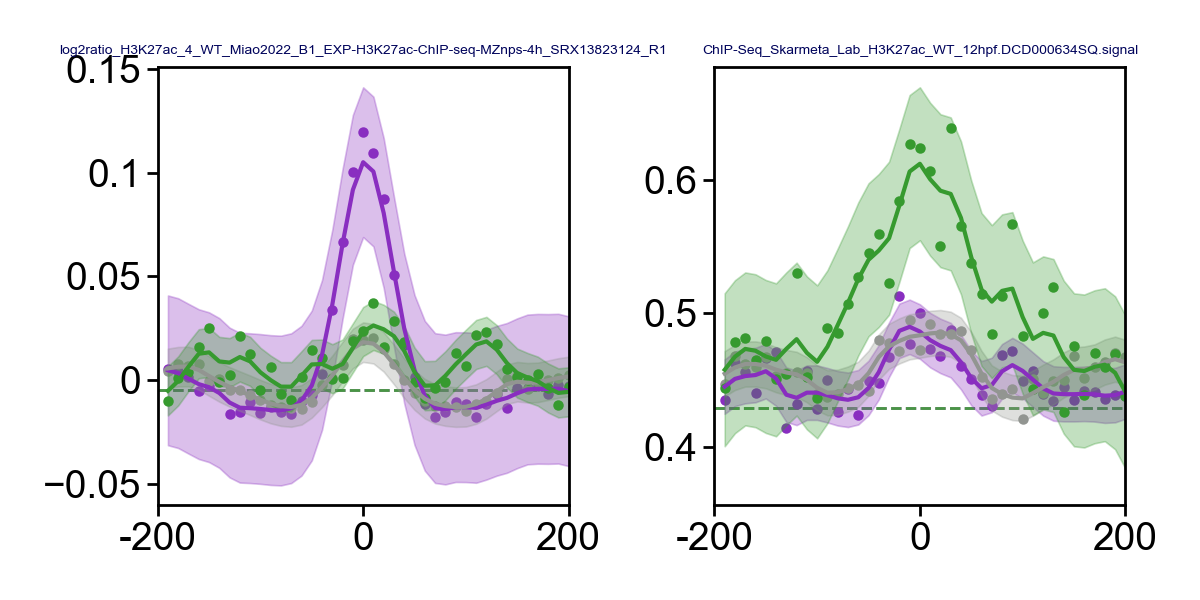

In [33]:
##########
# First three rows of the plot; sox/pou/nanog binding:
##########
ylabel = "log2(ChIP/input)"

figsize = 3

f, axes = plt.subplots(
    1, 2, figsize=[figsize * 2, figsize * 1], sharey=False, sharex=True
)

for i, (i_ax, track, idx, label, color) in enumerate(toplot):
    f_stack = f"{track}.npy"
    f_bg = f"{track}.bg"
    stack = stacks_bins[f_stack]
    bg = bgs_bins[f_bg]["value"].values
    title_stack = f_stack.replace(".npy", "")
    ax = axes[i_ax]

    plot_profile(
        stack,
        bg,
        idx,
        ax=ax,
        color=color,
        label=None,  # label,
        ylabel=title_stack,  # ylabel,
        run_zscore=False,
        flank=flank,
        resolution=binsize,
        ticks_step=ticks_step,
        abline_y=True,
        scatter=True,
        run_smooth=True,
    )
    ax.set_title(track, size=5)

    ax.minorticks_off()

f.subplots_adjust(left=0.15, top=0.95)
f.tight_layout()

if do_save:
    prefix = f"{output_folder}/Fig4C.profiles-27ac.WT-TR-diff"
    f.savefig(f"{prefix}.pdf")
    f.savefig(f"{prefix}.png")

In [34]:
output_data = []

##########
# First three rows of the plot; sox/pou/nanog binding:
##########
ylabel = "log2(ChIP/input)"

output_data = []

for i, (i_ax, track, idx, label, color) in enumerate(toplot):
    f_stack = f"{track}.npy"
    f_bg = f"{track}.bg"
    stack = stacks_bins[f_stack]
    bg = bgs_bins[f_bg]["value"].values
    title_stack = f_stack.replace(".npy", "")

    x, y_mean, y_smooth, y_std_smooth, bg_mean = plot_profile(
        stack,
        bg,
        idx,
        run_zscore=False,
        run_smooth=True,
        return_source_data=True,
    )

    df_output = pd.DataFrame(
        {
            "x": x * binsize - flank - binsize,
            "y_mean": y_mean,
            "y_smoothed": y_smooth,
            "y_std_smoothed": y_std_smooth,
            "bg": bg_mean,
        }
    ).T
    df_output.loc[:, "track"] = track
    df_output.loc[:, "label"] = label
    df_output.loc[:, "ylabel"] = ylabel

    output_data.append(df_output.copy())

In [35]:
output_data = pd.concat(output_data)

if do_save:
    prefix = f"{output_folder}/Fig4C.profiles-27ac.WT-TR-diff"
    output_data.to_csv(f"{prefix}.source.csv", sep="\t")

In [36]:
section_flush()

✅ Section cleaned


### + Pileups with heatmaps (SFig. 2A, D)

#### + Heatmaps of epigenetics (SFig. 2A)

In [37]:
section_start()

✅ Section started


In [38]:
selection = [
    ("ATAC-seq_WT4_3_Gao_2022", "ATAC-Seq"),
    ("log2ratio_Nanog-like_4.5hpf_Xu2012_R1", "Nanog"),
    ("RNApolII_Log2_input_WT4hpf_Miao_2022", "RNAPolII"),
    (
        "log2ratio_H3K27ac_4_WT_Miao2022_B1_EXP-H3K27ac-ChIP-seq-MZnps-4h_SRX13823124_R1",
        "H3K27ac",
    ),
    (
        "log2ratio_H3K4me3_4_WT_Miao2022_B1_EXP-H3-and-histone-mod-ChIP-seq-MZnps-4h_SRX13823130_R1",
        "H3K4me3",
    ),
    ("Rad21_Wike_4_log2_ChIP_input", "Rad21"),
]
flank = 200_000
ticks_step = 200_000

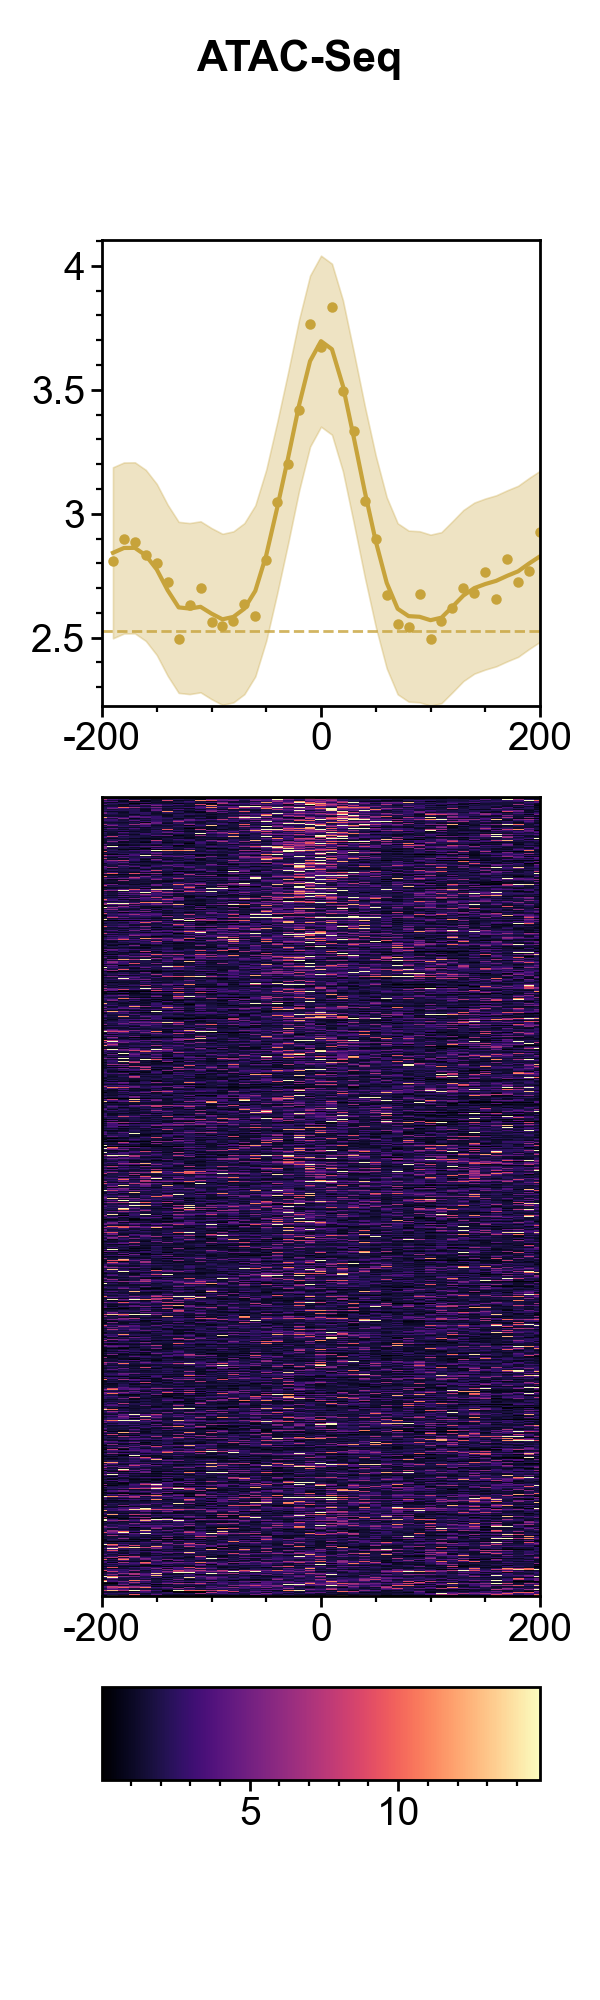

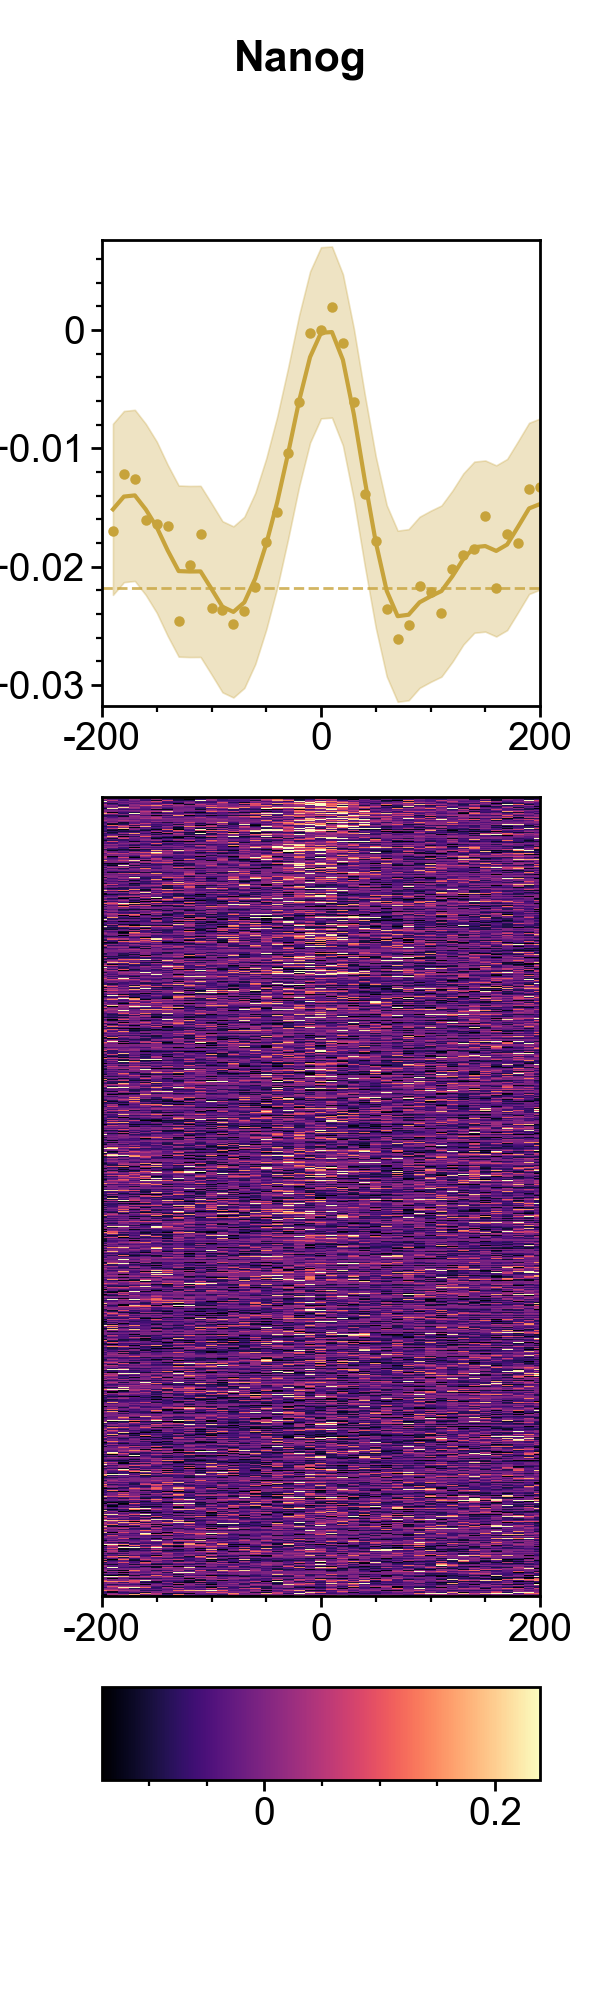

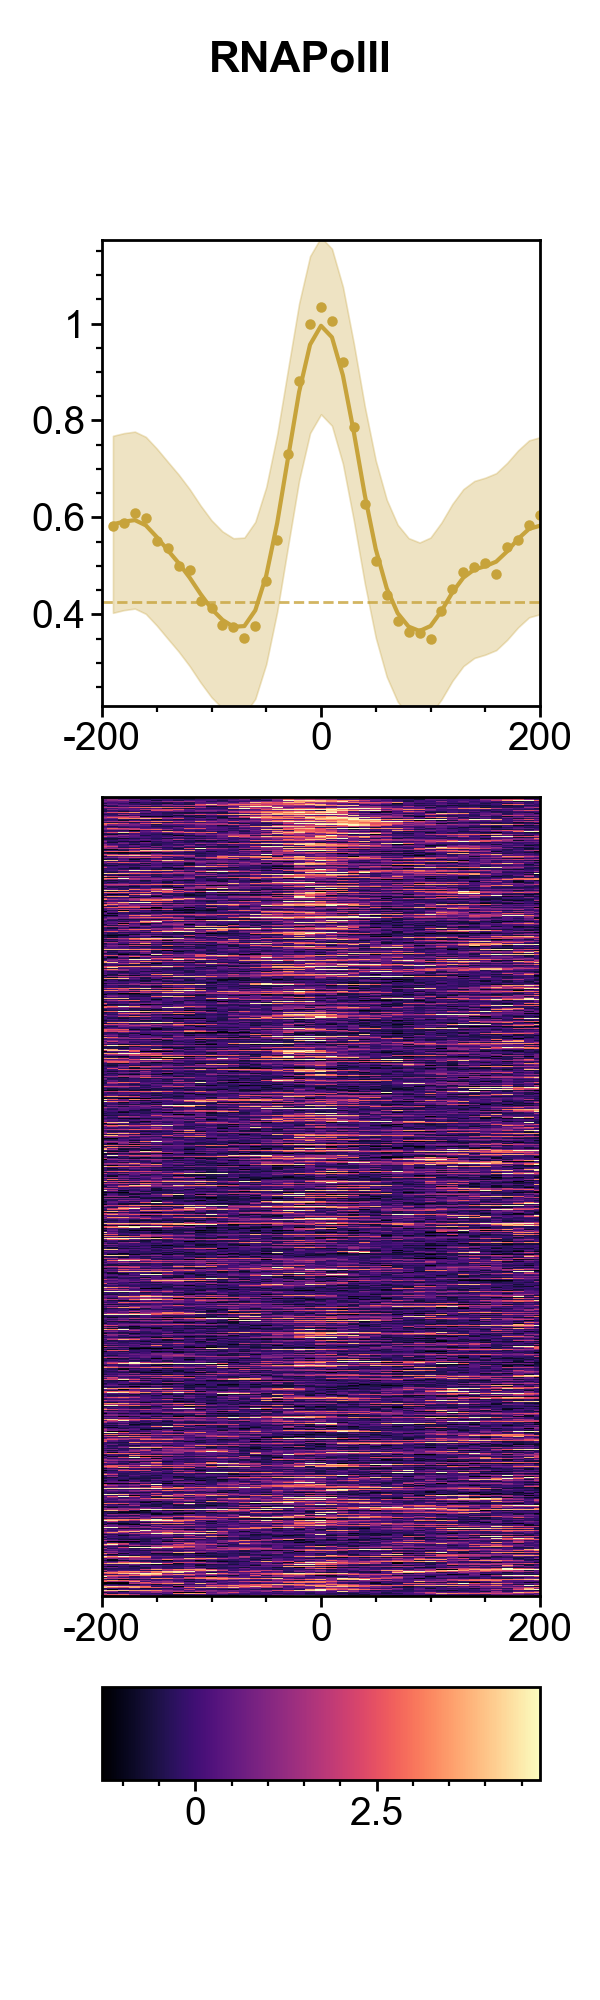

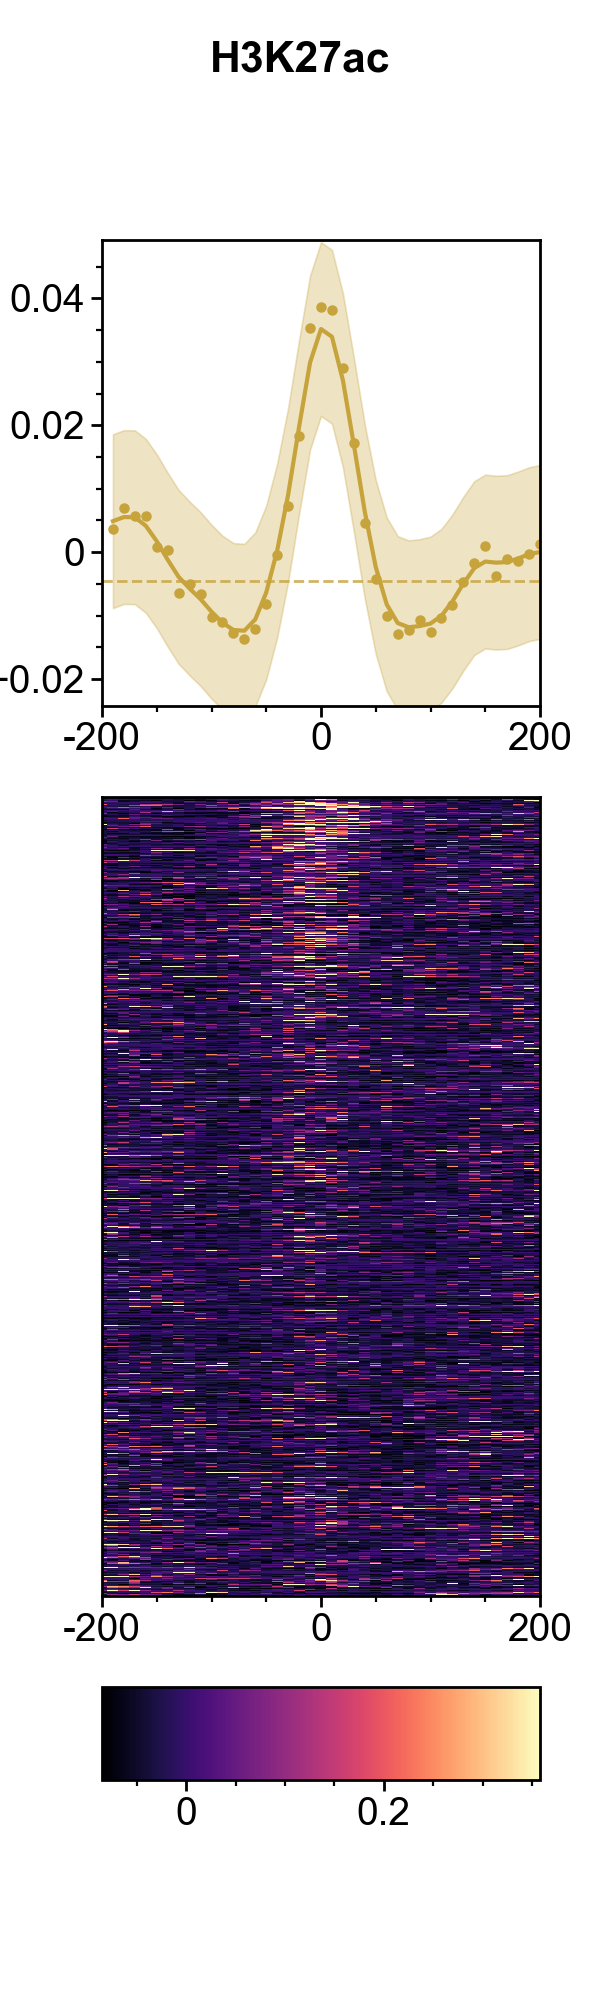

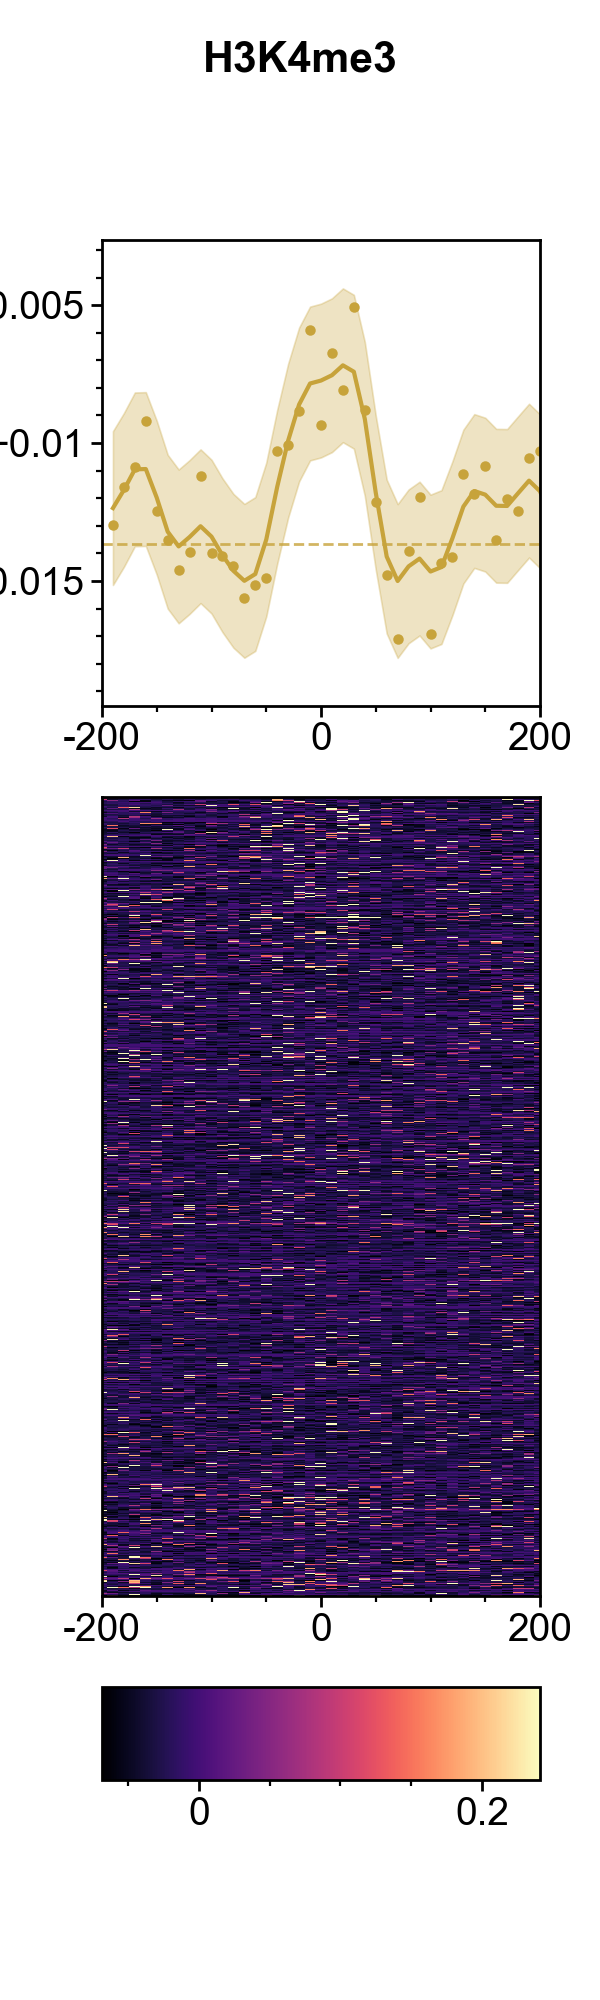

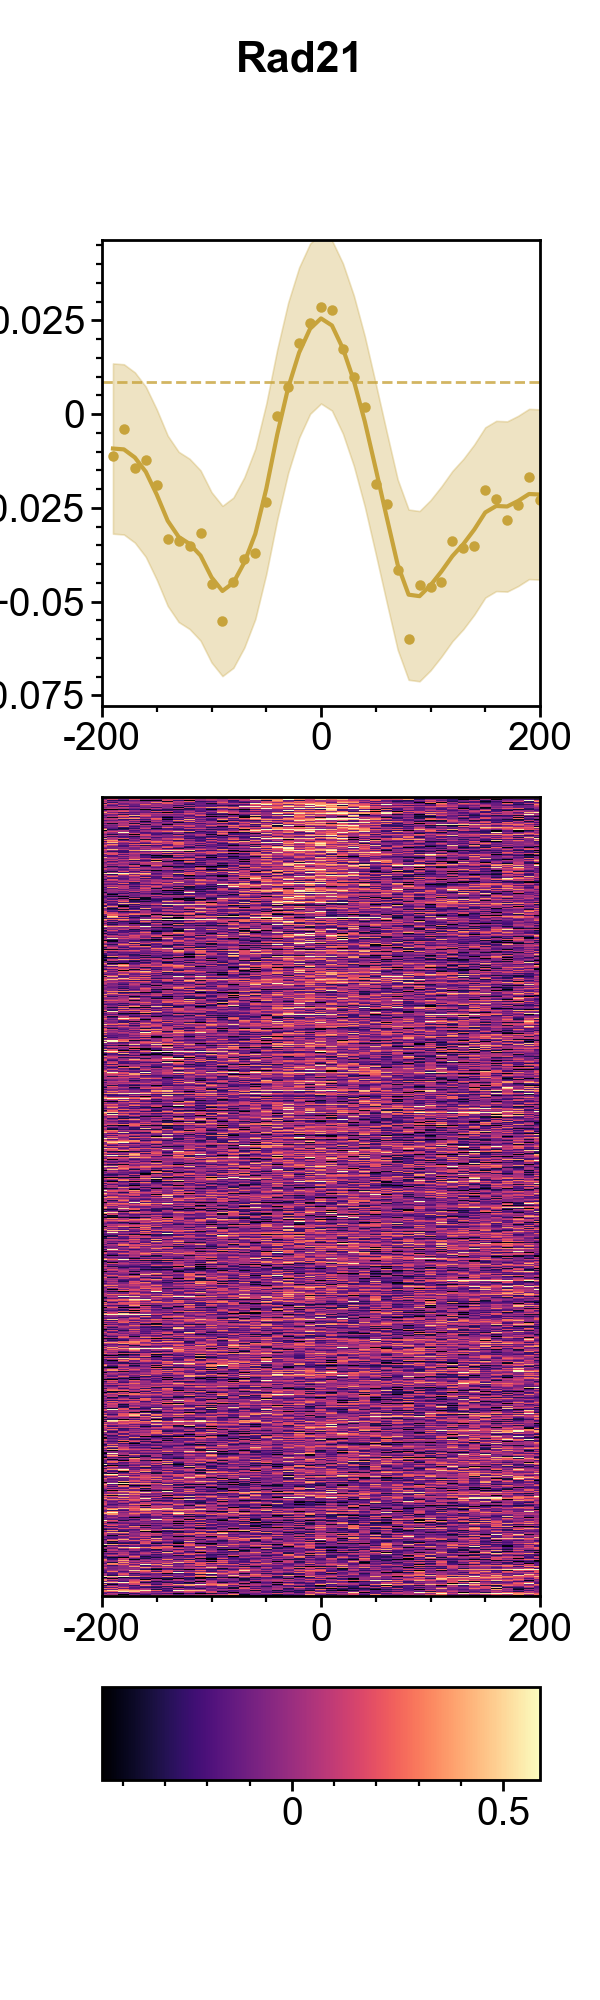

In [40]:
for i, (idx, label, color) in enumerate(
    [
        (df_fountains.index, "fountains 5.3 hpf", color_fountains_dome),
    ]
):

    for track, title in selection:

        ### Definitions
        f_stack = f"{track}.npy"
        f_bg = f"{track}.bg"
        stack = stacks_bins[f_stack]
        bg = bgs_bins[f_bg]["value"].values
        title_stack = f_stack.replace(".npy", "")

        vmin = np.nanpercentile(bg, 1)
        vmax = np.nanpercentile(bg, 99)

        vmin_profile = np.nanmin(np.nanmean(stack[idx, :], axis=0))
        vmax_profile = np.nanmax(np.nanmean(stack[idx, :], axis=0))
        range_profile = vmax_profile - vmin_profile
        vmin_profile -= 0.2 * range_profile
        vmax_profile += 0.2 * range_profile

        ### Plotting
        fig, axes = plt.subplots(
            3, 1, figsize=[3, 10], gridspec_kw={"height_ratios": [0.5, 1, 0.1]}
        )

        ax_profile = axes[0]
        ax_heatmap = axes[1]
        ax_cbar = axes[2]
        ax_profile.sharex(ax_heatmap)

        # Plot profile:
        plot_profile(
            stack,
            bg,
            idx,
            ax=ax_profile,
            color=color,
            label=label,
            ylabel="",
            run_zscore=False,
            flank=flank,
            resolution=binsize,
            ticks_step=ticks_step,
            abline_y=True,
            abline_x=False,
        )
        ax_profile.set_ylim(vmin_profile, vmax_profile)
        ax_profile.set_xticklabels([])

        # Plot heatmap:
        im = ax_heatmap.imshow(
            stack[idx, :], cmap="magma", vmin=vmin, vmax=vmax
        )  # , interpolation='none')
        ax_heatmap.set_aspect(0.05)
        ax_heatmap.set_xticks(
            np.arange(0, 2 * flank // binsize + 1, ticks_step // binsize)
        )
        ax_heatmap.set_xticklabels(
            (np.arange(0, 2 * flank + 1, ticks_step) - flank) // 1_000
        )
        ax_heatmap.set_yticks([])

        # Colorbar:
        plt.colorbar(mappable=im, cax=ax_cbar, orientation="horizontal")
        fig.subplots_adjust(wspace=0.0, hspace=0.05, left=0.17)
        fig.suptitle(title)

        if do_save:
            prefix = f"{output_folder}/SFig2A.pileup-heatmap.{title}"
            fig.savefig(f"{prefix}.pdf")
            fig.savefig(f"{prefix}.png")

In [41]:
output_data = []

for i_row, (track, title) in enumerate(selection):
    f_stack = f"{track}.npy"
    f_bg = f"{track}.bg"
    stack = stacks_bins[f_stack]
    bg = bgs_bins[f_bg]["value"].values
    x, y_mean, y_smooth, y_std_smooth, bg_mean = plot_profile(
        stack, bg, idx, run_zscore=False, return_source_data=True
    )
    df_output = pd.DataFrame(
        {
            "x": x * binsize - flank - binsize,
            "y_mean": y_mean,
            "y_smoothed": y_smooth,
            "y_std_smoothed": y_std_smooth,
            "bg": bg_mean,
        }
    ).T
    df_output.loc[:, "track"] = track
    df_output.loc[:, "ylabel"] = title

    output_data.append(df_output.copy())
    del df_output

output_data = pd.concat(output_data)

In [42]:
if do_save:
    prefix = f"{output_folder}/SFig2A.pileup-heatmap"
    output_data.to_csv(f"{prefix}.source.csv", sep="\t")

In [43]:
section_flush()

✅ Section cleaned


#### + Heatmaps for initiation zones (1 Mb, SFig. 2D)

In [44]:
section_start()

✅ Section started


In [45]:
from lib.read_nonstandard import stacks_bins_1Mb

In [46]:
selection = [
    ("dome", "Replication Timing", (-4.5, 4.5), (-0.3, 1.1)),
    ("ATAC-seq_WT4_3_Gao_2022", "ATAC-Seq", (-3, 10), (2, 4.2)),
    ("RNApolII_Log2_input_WT4hpf_Miao_2022", "RNAPolII", (-3, 6), (-0.1, 1.6)),
    (
        "log2ratio_H3K27ac_4_WT_Miao2022_B1_EXP-H3K27ac-ChIP-seq-MZnps-4h_SRX13823124_R1",
        "H3K27ac",
        (-0.5, 0.5),
        (-0.03, 0.045),
    ),
    ("Rad21_Wike_4_log2_ChIP_input", "Rad21", (-1.0, 1.0), (-0.06, 0.05)),
]

flank = 1_000_000
ticks_step = 1_000_000

In [47]:
order_IZ = (
    bins_IZ.dropna(subset="start_IZ")
    .sort_values("distance to fountain_IZ")
    .index.astype(int)
)
order_fount = df_IZs_fount2origin.sort_values("distance")["fountain_bin"].values

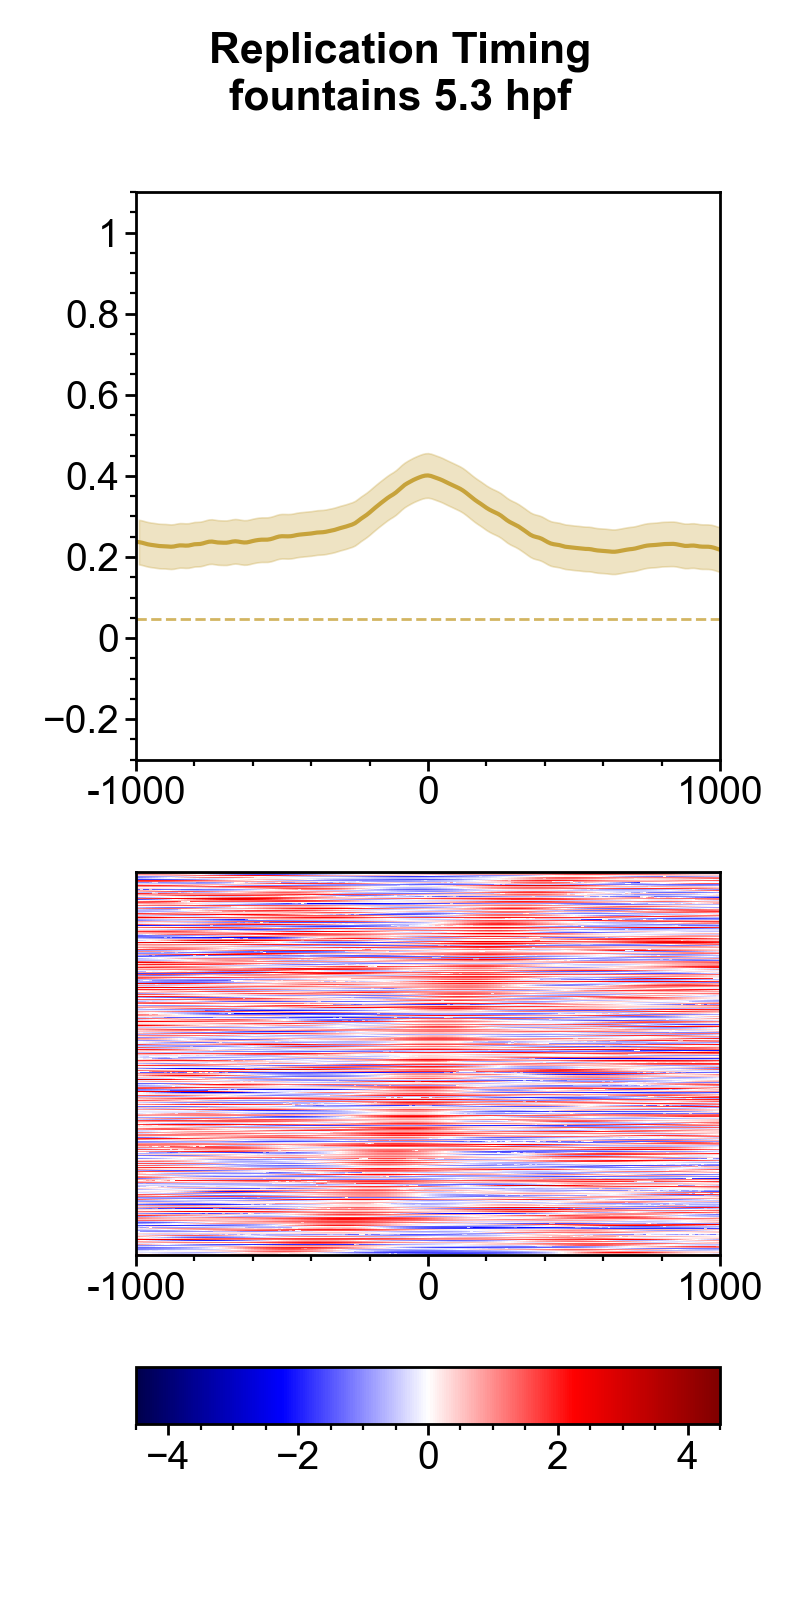

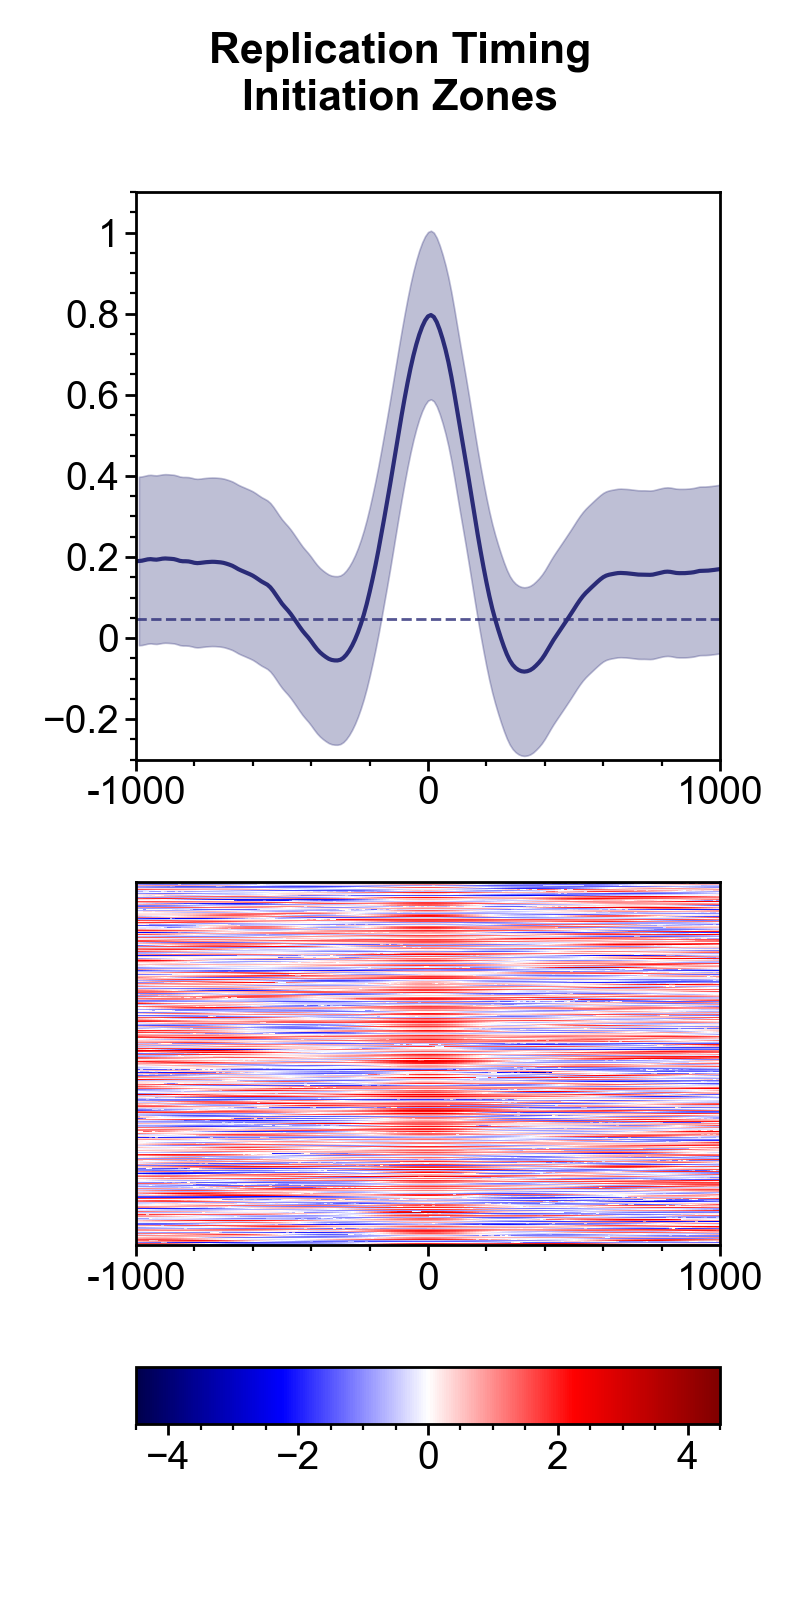

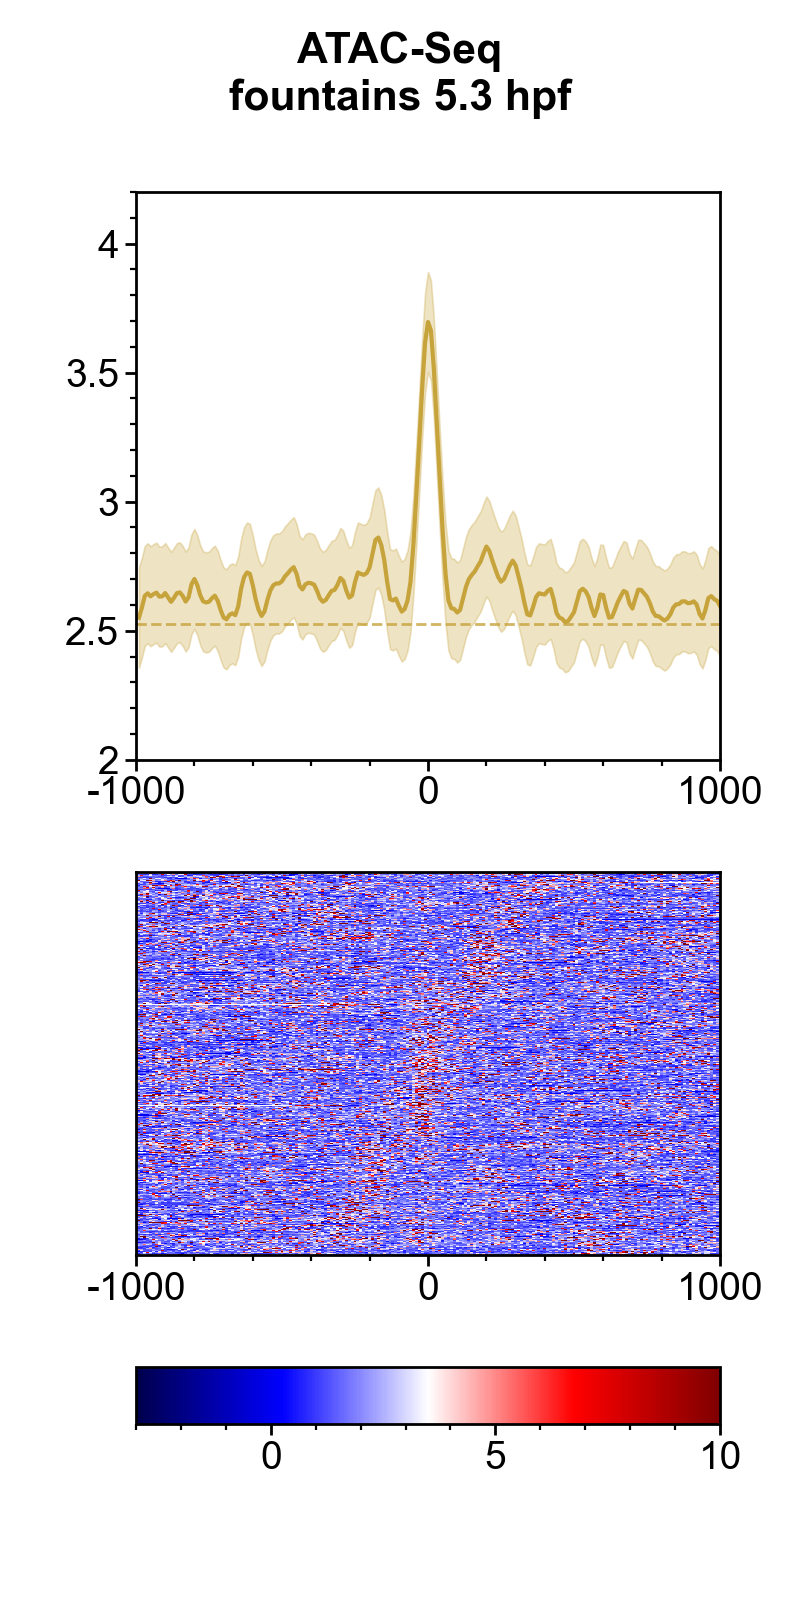

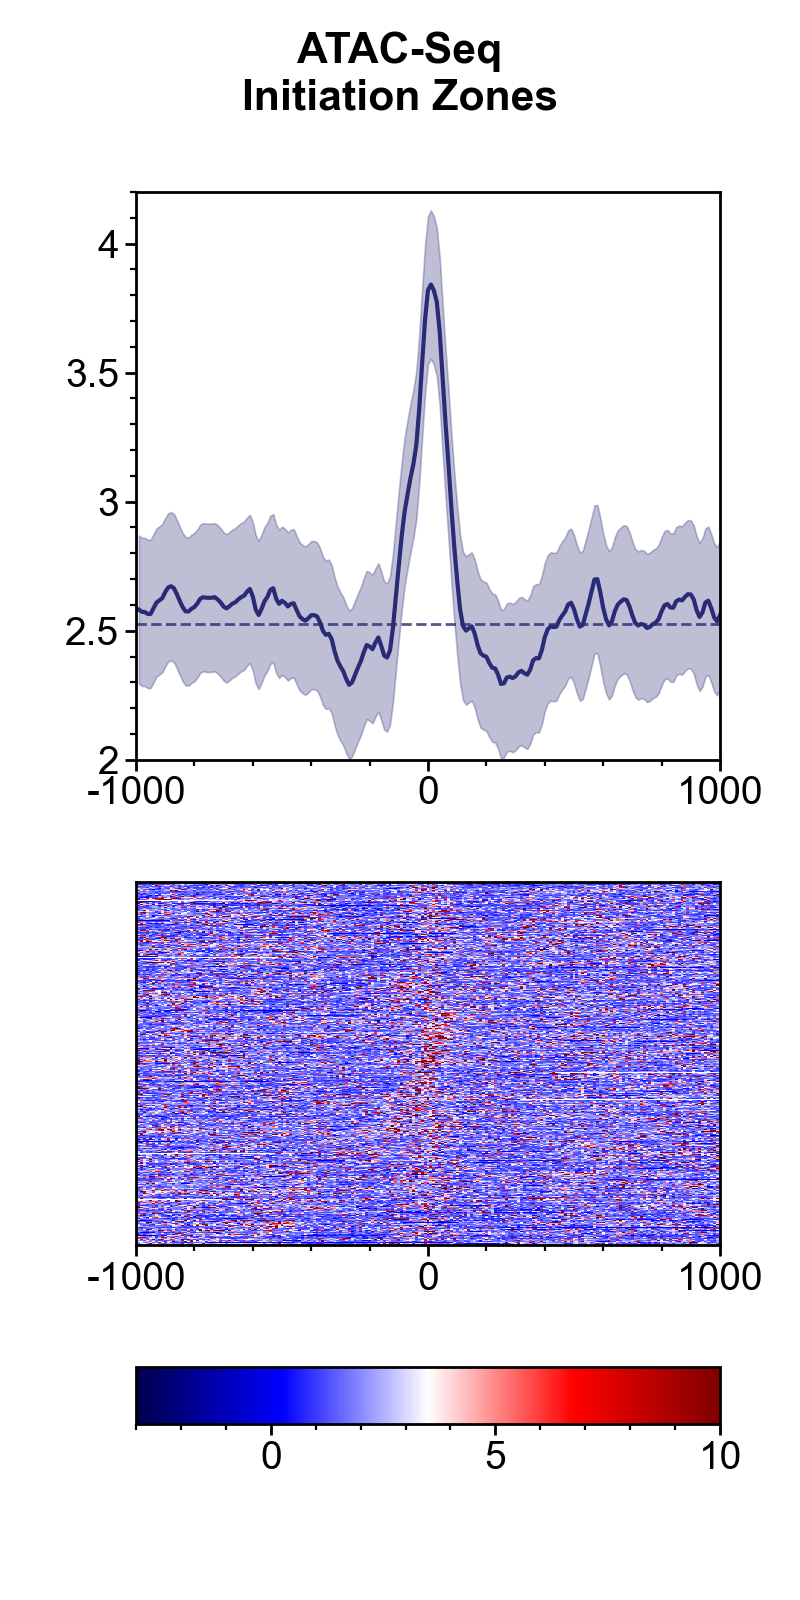

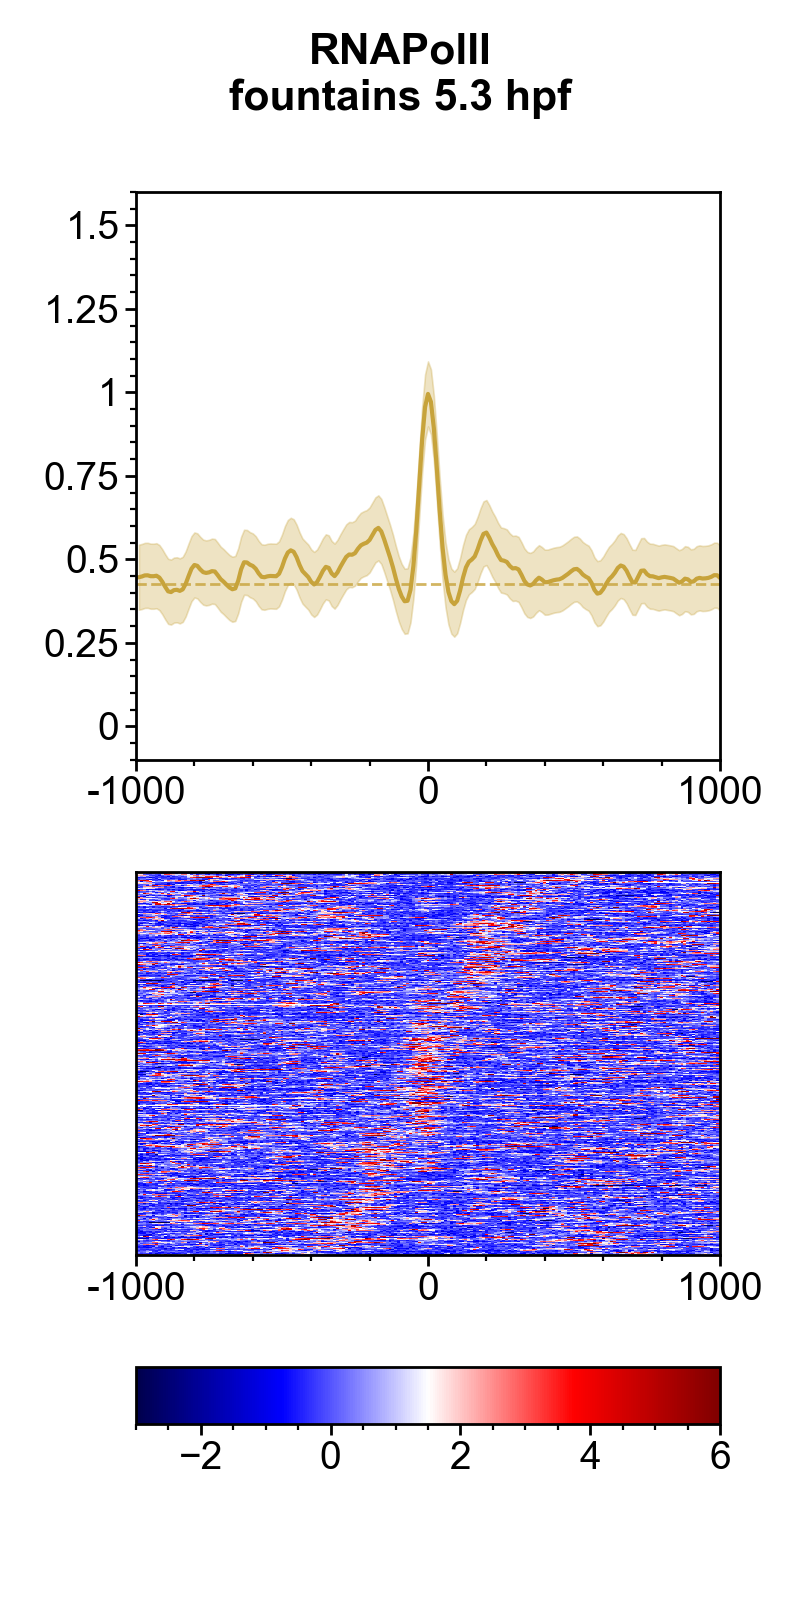

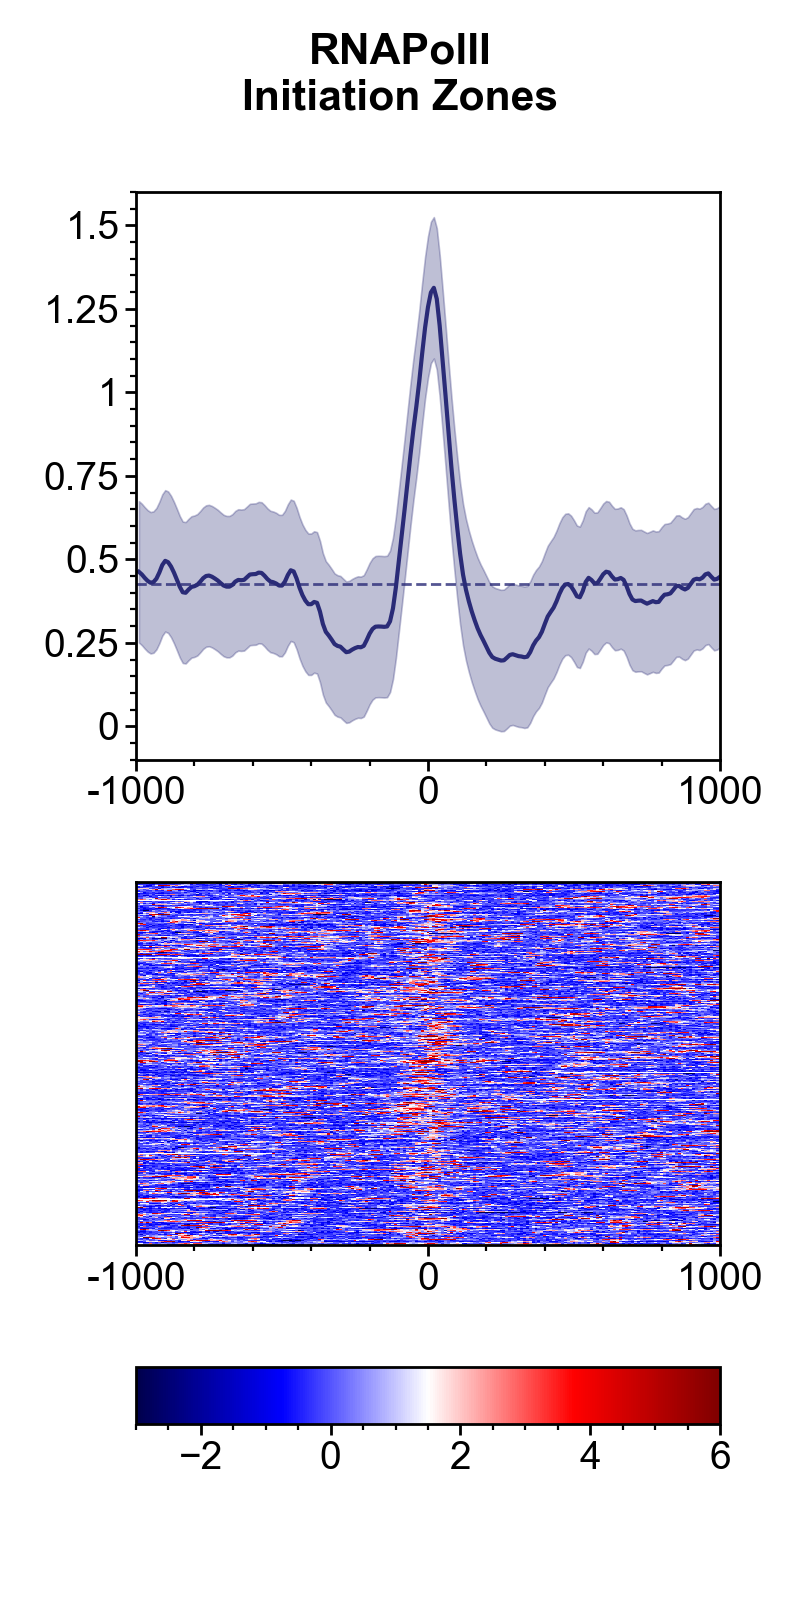

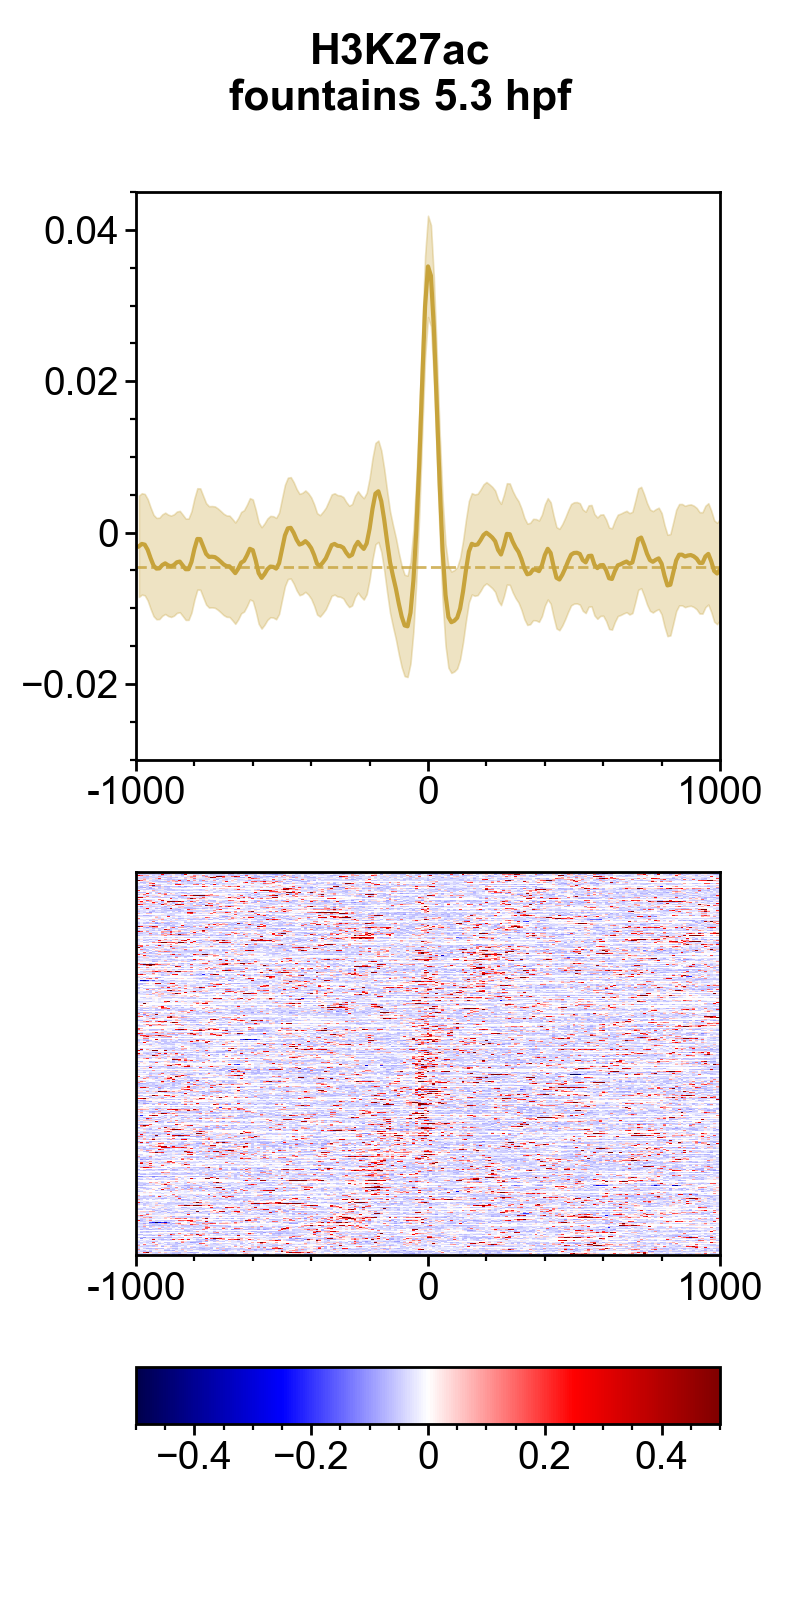

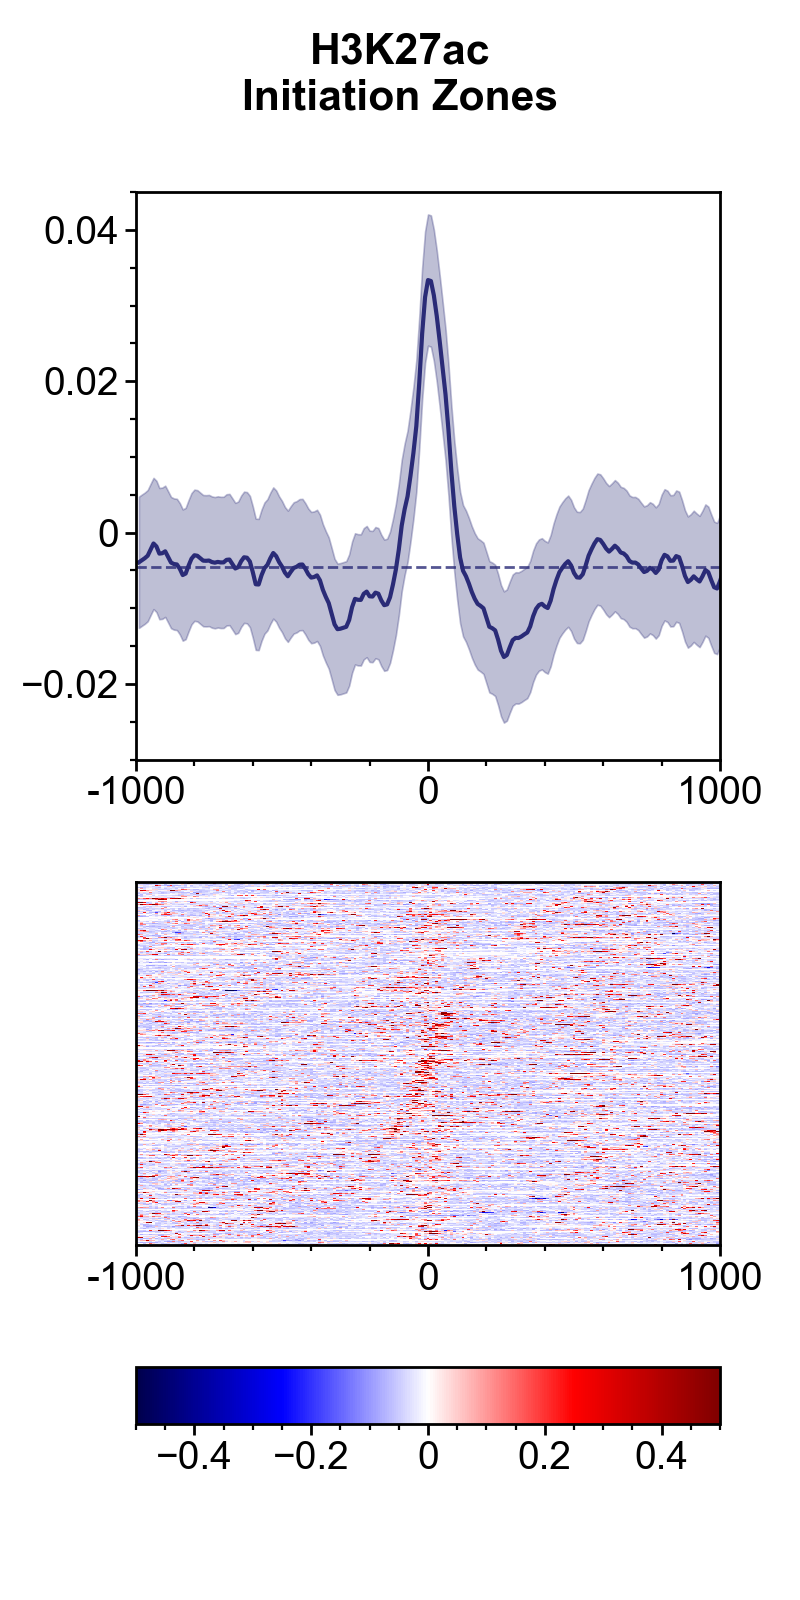

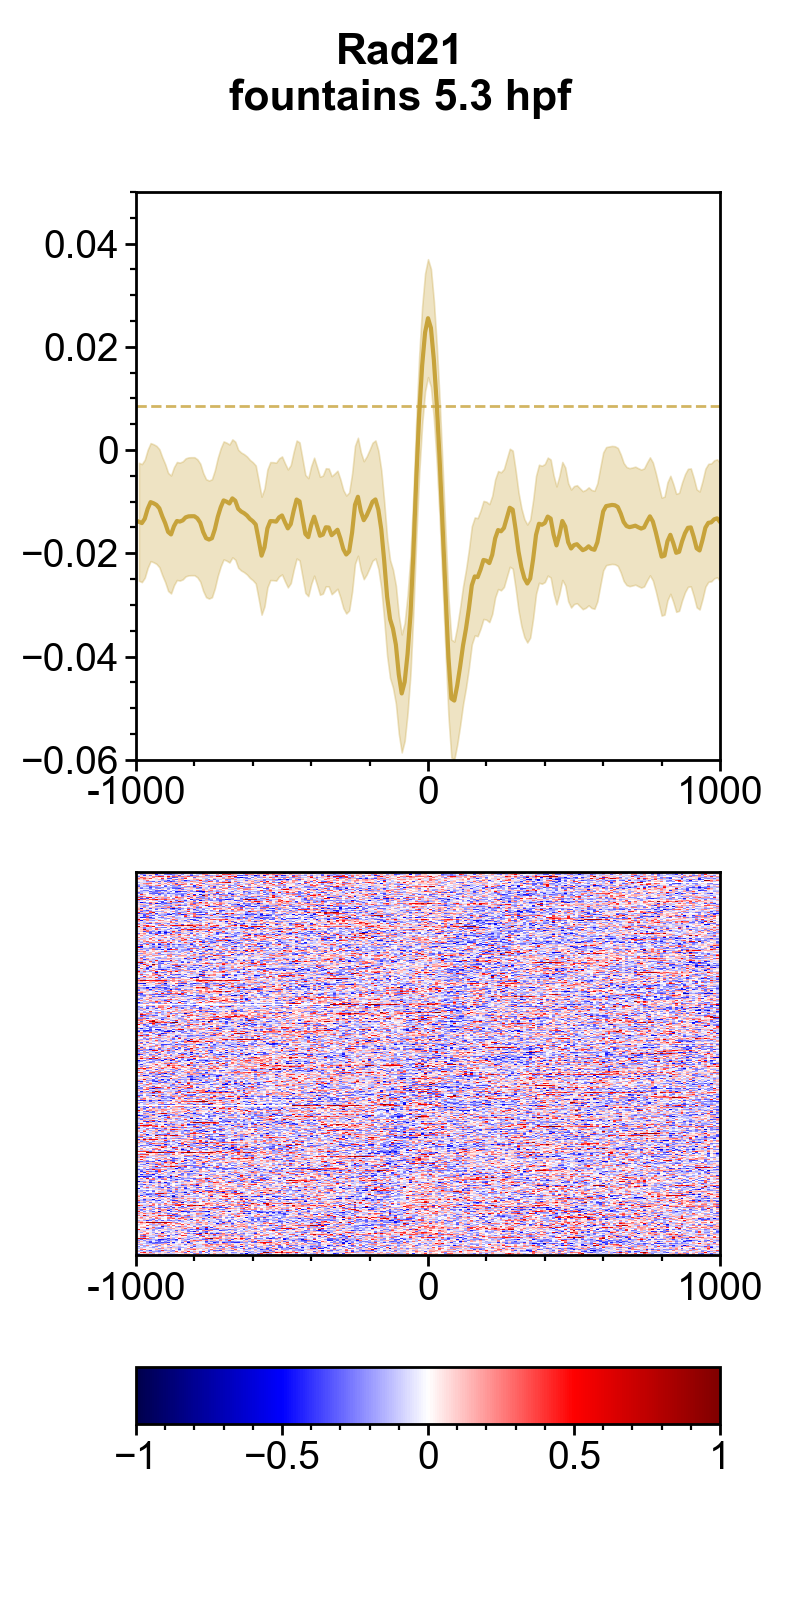

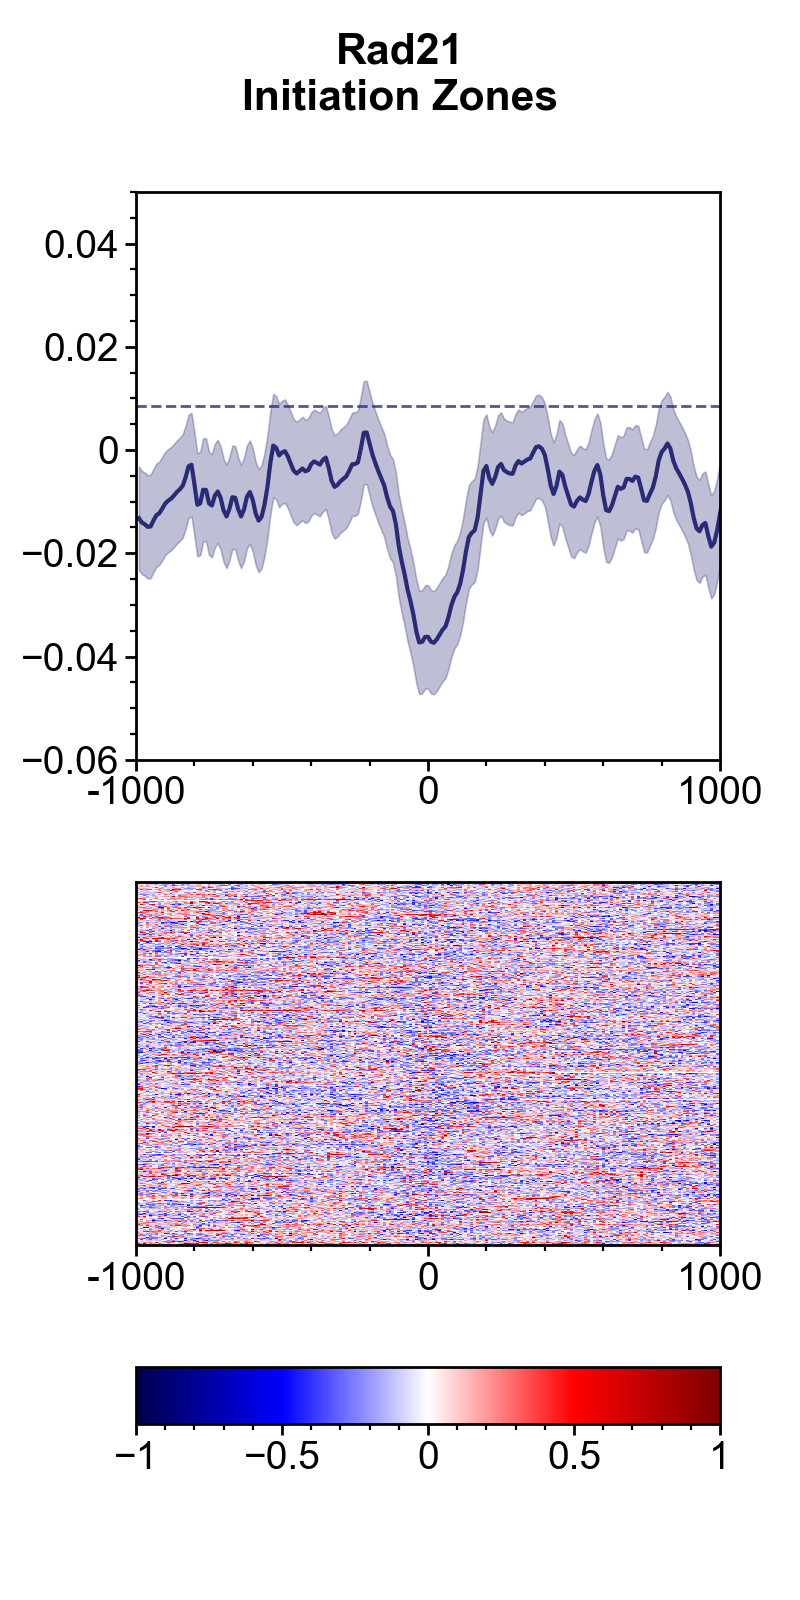

In [49]:
for track, title, (vmin, vmax), (vmin_profile, vmax_profile) in selection:

    for i, (idx, label, color, sort_order) in enumerate(
        [
            (
                df_fountains.index,
                "fountains 5.3 hpf",
                color_fountains_dome,
                order_fount,
            ),
            (
                bins_IZ.dropna(subset="start_IZ").index.astype(int),
                "Initiation Zones",
                color_IZ,
                order_IZ,
            ),
        ]
    ):
        ### Definitions
        f_stack = f"{track}.npy"
        f_bg = f"{track}.bg"
        stack = stacks_bins_1Mb[f_stack]
        bg = bgs_bins[f_bg]["value"].values
        title_stack = f_stack.replace(".npy", "")

        ### Plotting
        fig, axes = plt.subplots(
            3, 1, figsize=[4, 8], gridspec_kw={"height_ratios": [1, 1, 0.1]}
        )

        ax_profile = axes[0]
        ax_heatmap = axes[1]
        ax_cbar = axes[2]
        ax_profile.sharex(ax_heatmap)

        # Plot profile:
        plot_profile(
            stack,
            bg,
            idx,
            ax=ax_profile,
            color=color,
            label=label,
            ylabel="",
            run_zscore=False,
            run_smooth=True,
            scatter=False,
            flank=flank,
            resolution=binsize,
            ticks_step=ticks_step,
            abline_y=True,
            abline_x=False,
        )
        ax_profile.set_ylim(vmin_profile, vmax_profile)
        ax_profile.set_xticklabels([])

        # Plot heatmap:
        im = ax_heatmap.imshow(
            stack[sort_order, :], cmap="seismic", vmin=vmin, vmax=vmax
        )
        ax_heatmap.set_aspect(0.09)
        ax_heatmap.set_xticks(
            np.arange(0, 2 * flank // binsize + 1, ticks_step // binsize)
        )
        ax_heatmap.set_xticklabels(
            (np.arange(0, 2 * flank + 1, ticks_step) - flank) // 1_000
        )
        ax_heatmap.set_yticks([])

        # Colorbar:
        plt.colorbar(mappable=im, cax=ax_cbar, orientation="horizontal")
        fig.subplots_adjust(wspace=0.0, hspace=0.05, left=0.17)
        fig.suptitle(f"{title}\n{label}")

        if do_save:
            prefix = f"{output_folder}/SFig2D.pileup-heatmap.{title}.{label}"
            fig.savefig(f"{prefix}.pdf")
            fig.savefig(f"{prefix}.png")

In [50]:
output_data = []

for track, title, (vmin, vmax), (vmin_profile, vmax_profile) in selection:

    for i, (idx, label, color, sort_order) in enumerate(
        [
            (
                df_fountains.index,
                "fountains 5.3 hpf",
                color_fountains_dome,
                order_fount,
            ),
            (
                bins_IZ.dropna(subset="start_IZ").index.astype(int),
                "Initiation Zones",
                color_IZ,
                order_IZ,
            ),
        ]
    ):

        f_stack = f"{track}.npy"
        f_bg = f"{track}.bg"
        stack = stacks_bins_1Mb[f_stack]
        bg = bgs_bins[f_bg]["value"].values
        x, y_mean, y_smooth, y_std_smooth, bg_mean = plot_profile(
            stack, bg, idx, run_zscore=False, return_source_data=True
        )
        df_output = pd.DataFrame(
            {
                "x": x * binsize - flank - binsize,
                "y_mean": y_mean,
                "y_smoothed": y_smooth,
                "y_std_smoothed": y_std_smooth,
                "bg": bg_mean,
            }
        ).T
        df_output.loc[:, "track"] = title
        df_output.loc[:, "ylabel"] = label

        output_data.append(df_output.copy())
        del df_output

output_data = pd.concat(output_data)

In [51]:
if do_save:
    prefix = f"{output_folder}/SFig2D.pileup-heatmap"
    output_data.to_csv(f"{prefix}.source.csv", sep="\t")

In [52]:
section_flush()

✅ Section cleaned
